In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import mglearn
sns.set(rc={'figure.figsize': (20, 15)})

In [2]:
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
y = iris.target

In [6]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
df_tmp = pd.DataFrame(X)

In [11]:
df_tmp['target'] = y

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

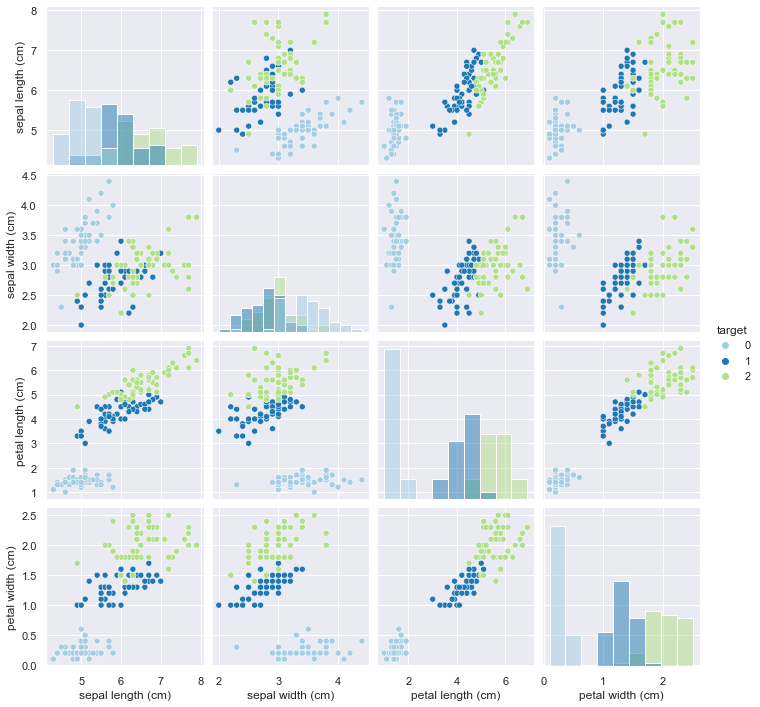

In [13]:
sns.pairplot(df_tmp, hue='target', palette='Paired', diag_kind='hist')

# Модель K-Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.score(X_train, y_train)

1.0

In [18]:
knn.predict_proba(X_test.iloc[-2:-1])

array([[1., 0., 0.]])

In [19]:
iris.target_names[knn.predict(X_test.iloc[-2:-1]).item()]

'setosa'

In [20]:
X_test.iloc[-2:-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
18,5.7,3.8,1.7,0.3,0


### Наша модель дает правильный ответ в 97 % случаях.

# Глава 2. Модели с учителем

## Орпеделение рака 

In [21]:
from sklearn.datasets import load_breast_cancer

In [22]:
df = load_breast_cancer()

In [23]:
X = pd.DataFrame(df.data, columns=df.feature_names)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [24]:
y = df.target

In [25]:
breast_df = X

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)

In [27]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
403,12.94,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.023900,0.1735,0.06200,...,13.860,23.02,89.69,580.9,0.11720,0.19580,0.18100,0.08388,0.3297,0.07834
26,14.58,21.53,97.41,644.8,0.10540,0.18680,0.142500,0.087830,0.2252,0.06924,...,17.620,33.21,122.40,896.9,0.15250,0.66430,0.55390,0.27010,0.4264,0.12750
271,11.29,13.04,72.23,388.0,0.09834,0.07608,0.032650,0.027550,0.1769,0.06270,...,12.320,16.18,78.27,457.5,0.13580,0.15070,0.12750,0.08750,0.2733,0.08022
281,11.74,14.02,74.24,427.3,0.07813,0.04340,0.022450,0.027630,0.2101,0.06113,...,13.310,18.26,84.70,533.7,0.10360,0.08500,0.06735,0.08290,0.3101,0.06688
429,12.72,17.67,80.98,501.3,0.07896,0.04522,0.014020,0.018350,0.1459,0.05544,...,13.820,20.96,88.87,586.8,0.10680,0.09605,0.03469,0.03612,0.2165,0.06025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
79,12.86,18.00,83.19,506.3,0.09934,0.09546,0.038890,0.023150,0.1718,0.05997,...,14.240,24.82,91.88,622.1,0.12890,0.21410,0.17310,0.07926,0.2779,0.07918
122,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.426800,0.201200,0.2655,0.06877,...,26.020,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
51,13.64,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,0.1353,0.05953,...,14.670,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025


In [28]:
train_score = []
test_score = []
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))
    


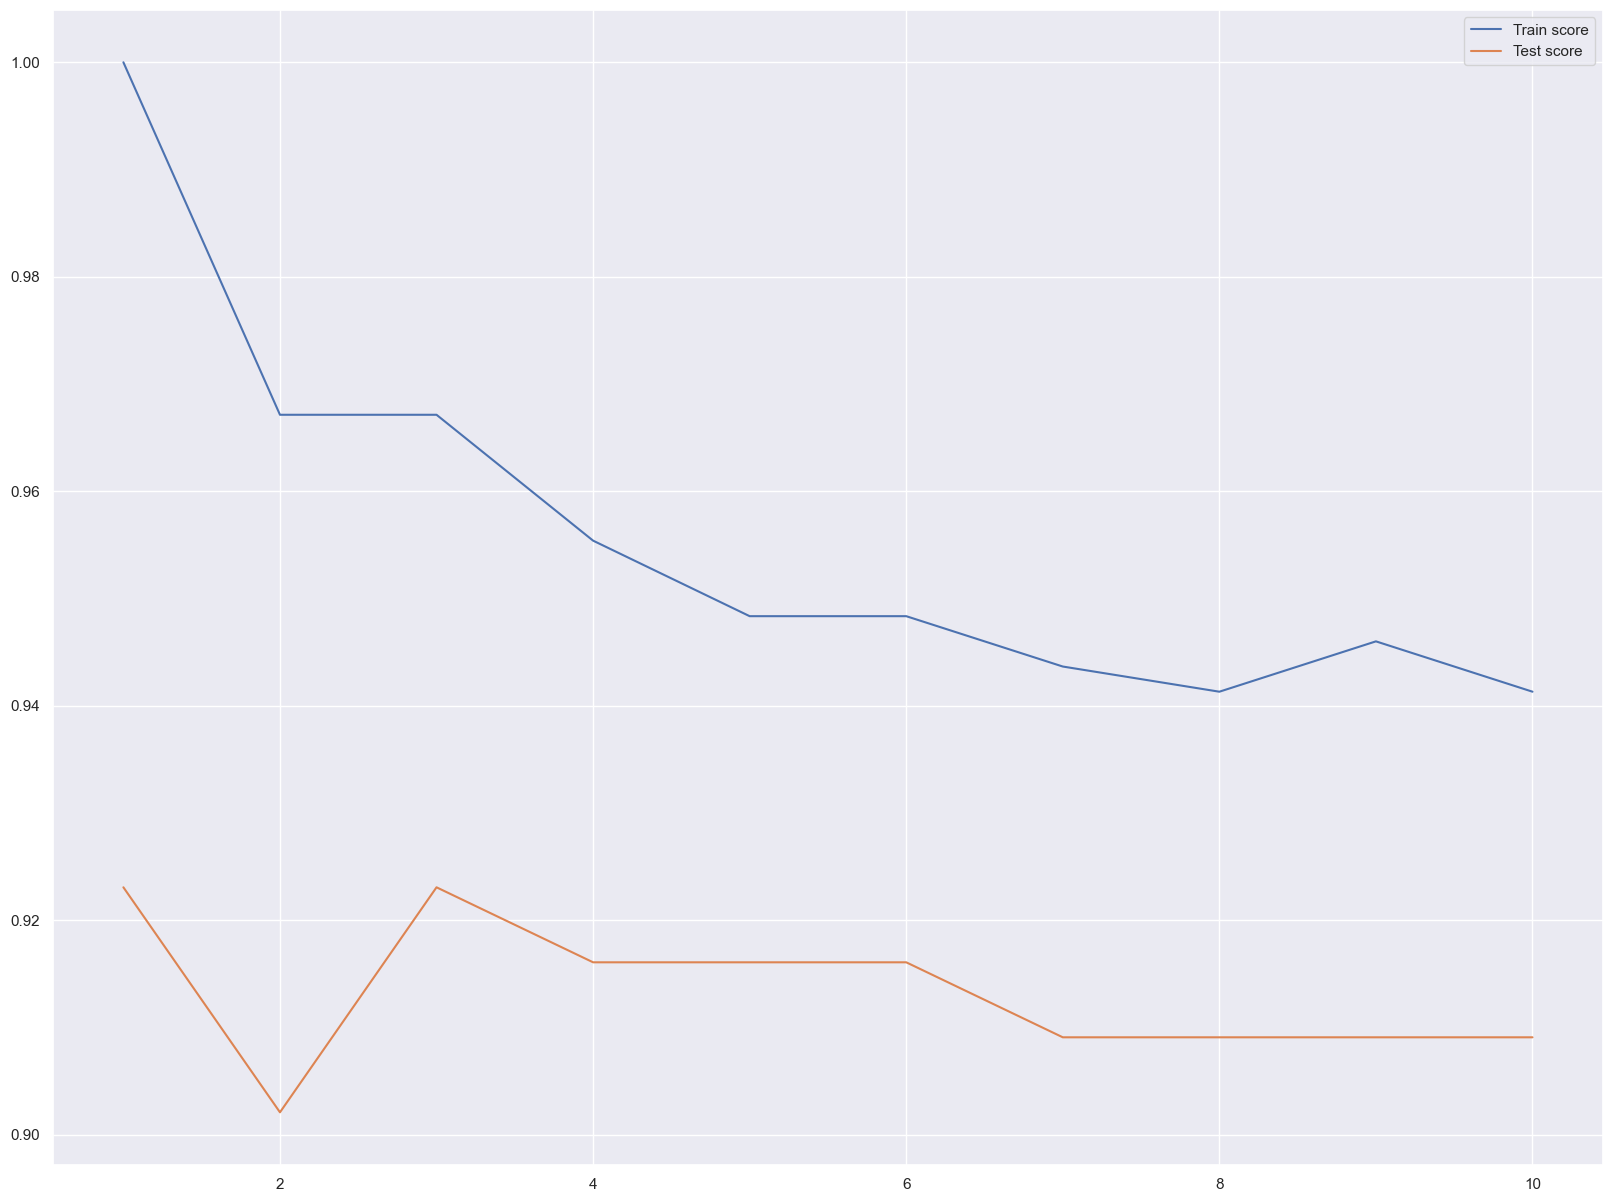

In [29]:
sns.lineplot(x=range(1, 11), y=train_score, label='Train score')
sns.lineplot(x=range(1,11), y=test_score, label='Test score')
plt.legend()

<AxesSubplot:>

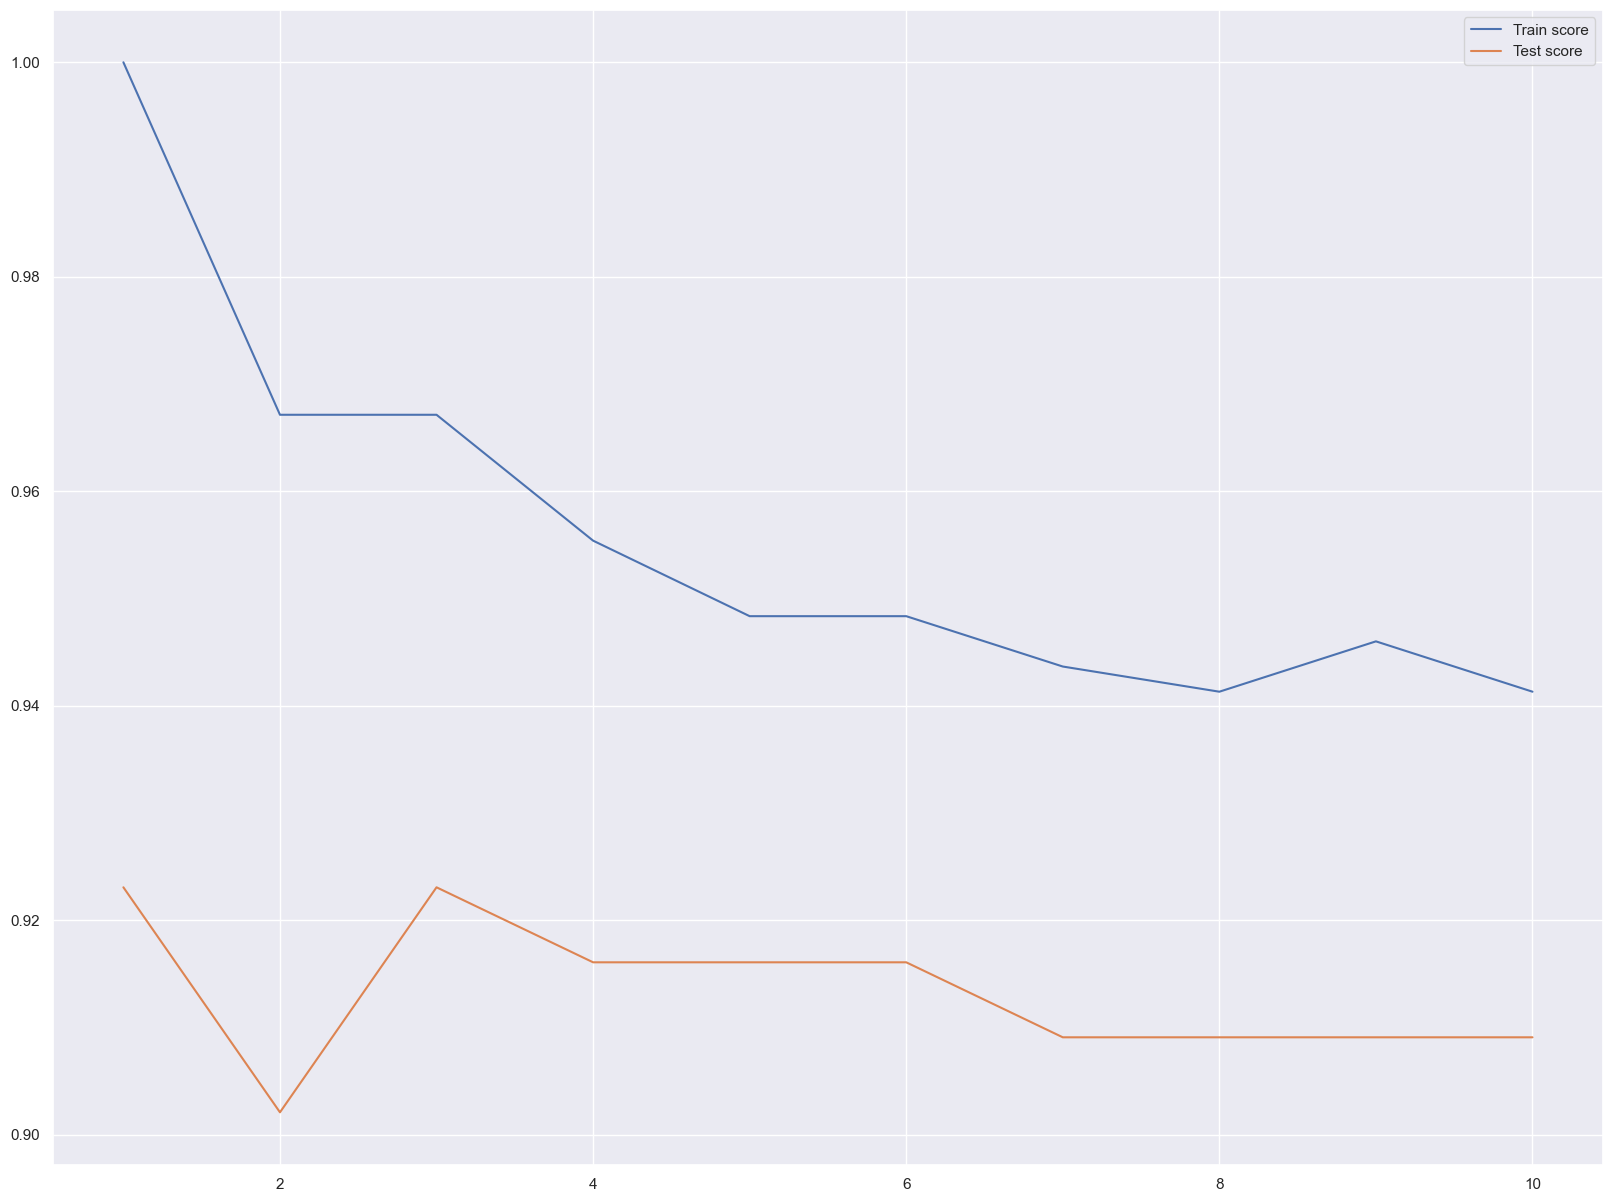

In [30]:
train_score = []
test_score = []
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))
sns.lineplot(x=range(1, 11), y=train_score, label='Train score')
sns.lineplot(x=range(1, 11), y=test_score, label='Test score')


KNeighborsRegression показывают долю зависимой переменной , которую определяют независимые. R квадрат 

KNeighborsClassifier показывает точность предсказаний модели. Accuracy



## Бостон датасет 

In [31]:
from sklearn.datasets import load_boston

In [32]:
data = load_boston()

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets i

In [33]:
X = pd.DataFrame(data.data, columns=data.feature_names)

In [34]:
y = data.target

In [35]:
boston_df = X
boston_df['class'] = y

In [36]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,class
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [37]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Линейные модели


# Линейная регрессия


In [38]:
from sklearn.linear_model import LinearRegression

w[0]: 0.393906  b: -0.031804


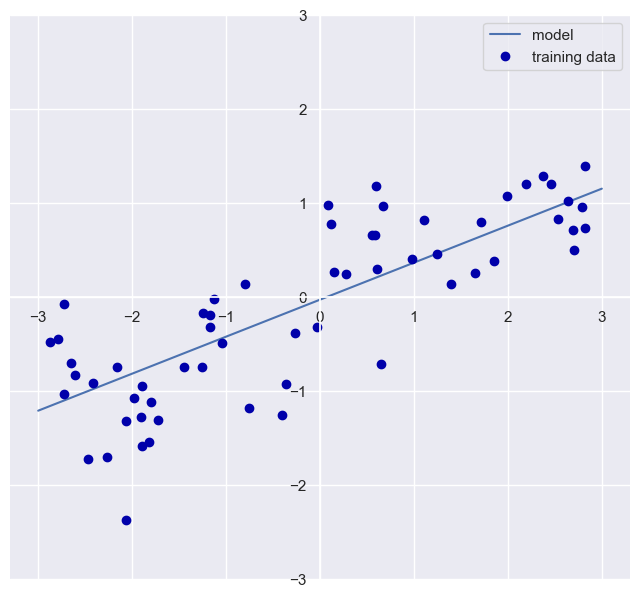

In [39]:
mglearn.plots.plot_linear_regression_wave()

In [40]:
X, y = mglearn.datasets.make_wave(n_samples=60)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
lr = LinearRegression().fit(X_train, y_train)

In [43]:
lr.coef_

array([0.39390555])

_coef угол наклона для фич

In [44]:
lr.intercept_

-0.031804343026759746

intrecept_ расположение на оси Y

In [45]:
lr.score(X_train, y_train)

0.6700890315075756

In [46]:
lr.score(X_test, y_test)

0.65933685968637

Маленькое значение R квадрат показыает плохое качество модели. Результаты на трен и тест схожи, возможно недообучение!

# Датасет Boston Housing

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
X, y = mglearn.datasets.load_extended_boston()

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets i

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
lr.score(X_train, y_train)

0.9448313975211593

In [52]:
lr.score(X_test, y_test)

0.7758378393351649

Явное переобучение модели!

# Гребневая регрессия Ridge

In [53]:
from sklearn.linear_model import Ridge

In [54]:
ridge = Ridge().fit(X_train, y_train)

In [55]:
ridge.score(X_train, y_train)

0.8700969775259921

In [56]:
ridge.score(X_test, y_test)

0.8145421818415552

Результат более менее устраивает. Критерий alpha отвечает за сжимание коэфицентов регрессии. Чем меньше alpha, тем болеее схожа с Линейной регрессией.

In [57]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

In [58]:
ridge10.score(X_train, y_train)

0.7669532344928074

In [59]:
ridge10.score(X_test, y_test)

0.7279392273706593

Результаты улучшились! ОБобщающая способность стала выше!

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets i

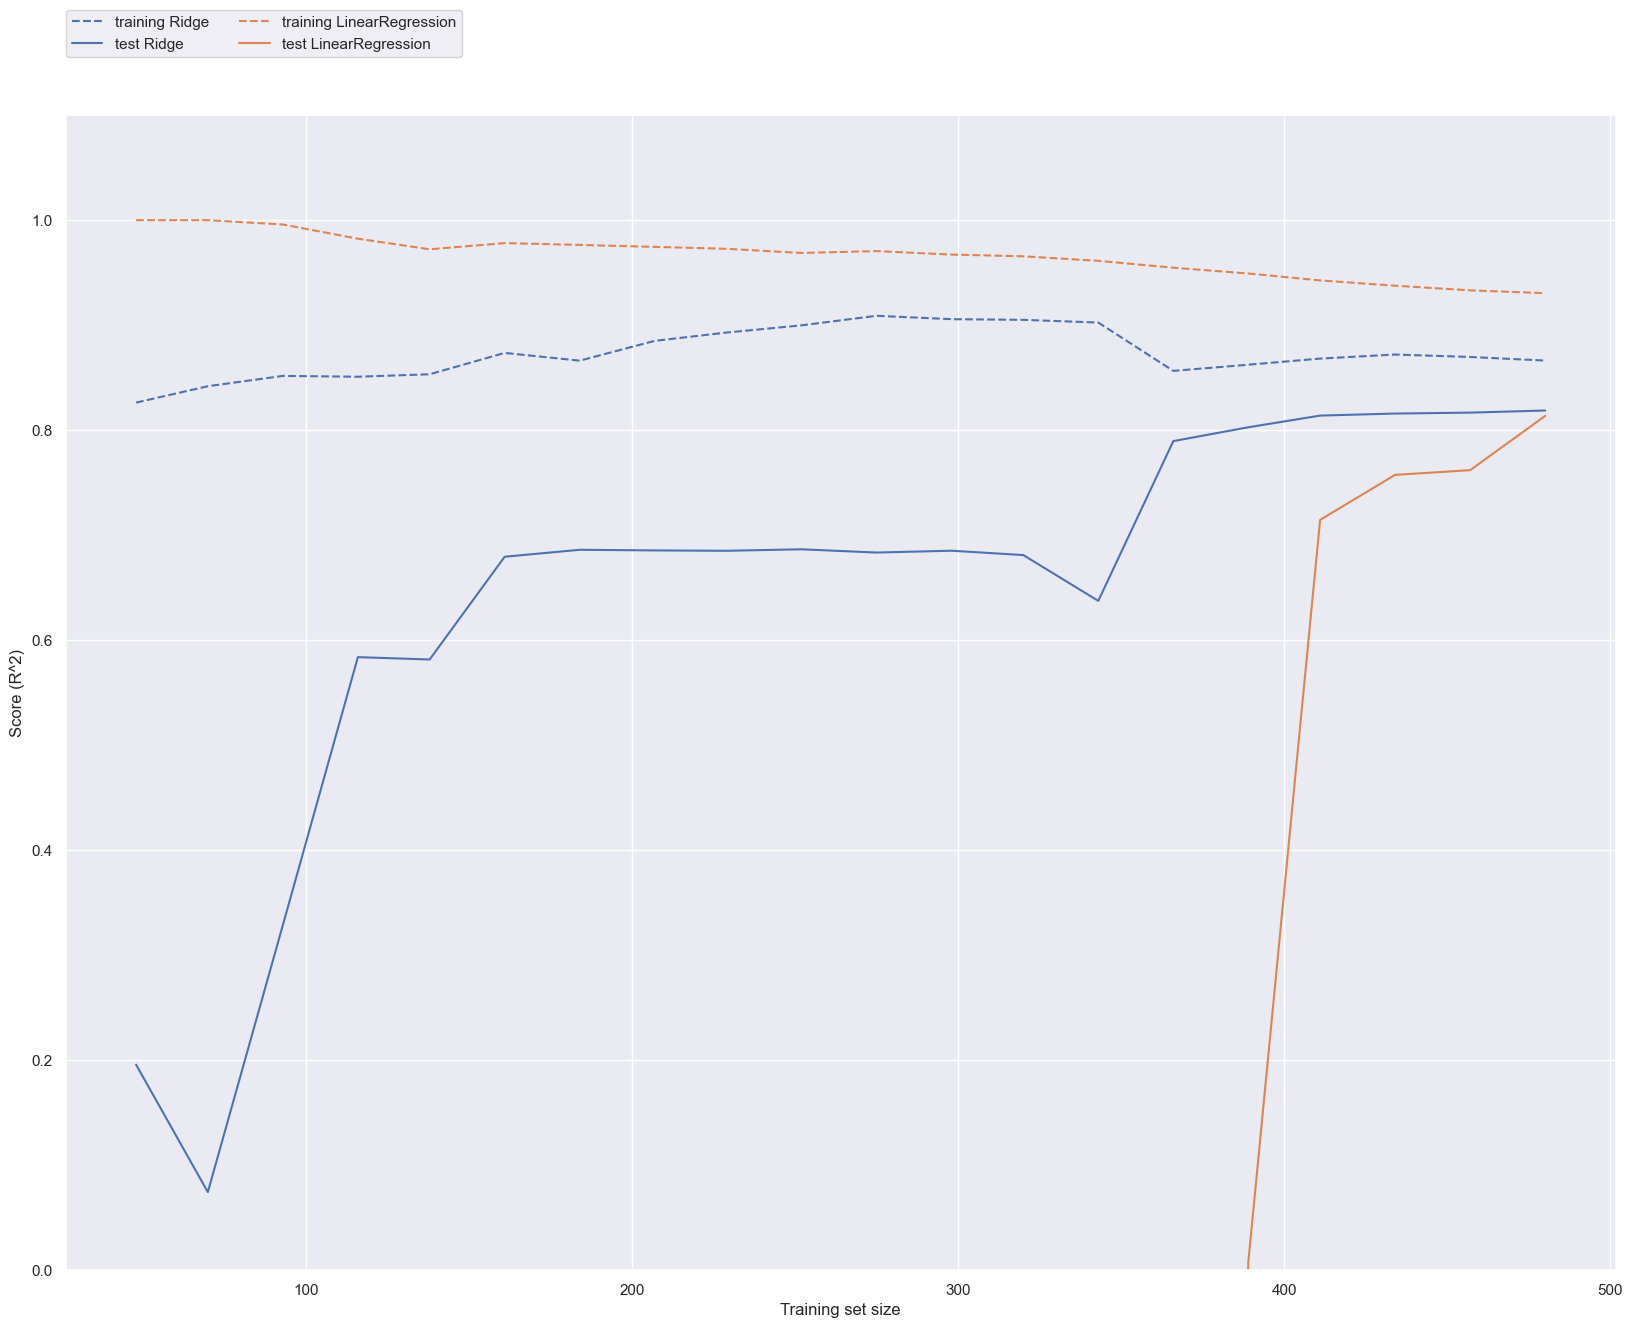

In [60]:
mglearn.plots.plot_ridge_n_samples()

R квадрат выше на обучающем в обоих моделях. При объеме данных менее 400 линейная регрессия не способна научиться. А также при возрастании объема данных Линейной регрессии сложнее переобучиться

# Лассо Lasso

In [61]:
from sklearn.linear_model import Lasso

In [62]:
lasso = Lasso().fit(X_train, y_train)

In [63]:
lasso.score(X_train, y_train)

0.26783778369518485

In [64]:
lasso.score(X_test, y_test)

0.2599232118344591

In [65]:
sum(lasso.coef_ != 0)

3

Видим недообучение! Из 105 признаков используется 3! параметры модели alpha max_iter

In [66]:
lasso01 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

In [67]:
lasso01.score(X_train, y_train)

0.9435815252488567

In [68]:
lasso01.score(X_test, y_test)

0.8080525356174062

In [69]:
sum(lasso01.coef_ != 0)

95

Чем меньше alpha тем ближе к Линейной модели!

# Линейные модели для классификации

Наиболее расрпостраненные модели классификации : 
## LogisticRegression
## LinearSVC ( support vector classifier)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [71]:
X, y = mglearn.datasets.make_forge()

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


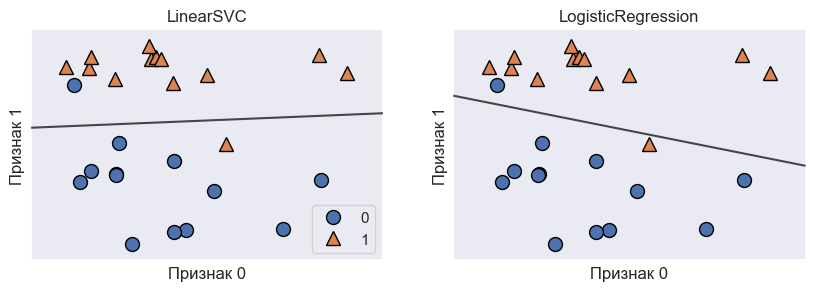

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend()

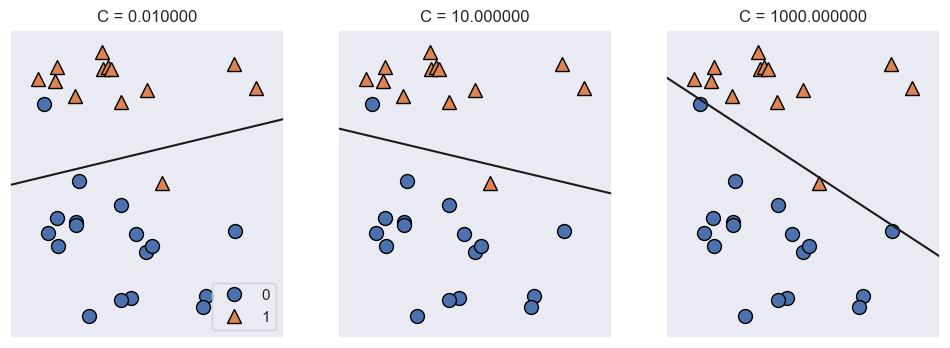

In [73]:
mglearn.plots.plot_linear_svc_regularization()

Использование низких значений C приводит к тому, что
алгоритмы пытаются подстроиться под «большинство» точек данных,
тогда как использование более высоких значений C подчеркивает
важность того, чтобы каждая отдельная точка данных была
классифицирована правильно. 

## LogisticRegression

In [74]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
logreg = LogisticRegression().fit(X_train, y_train)

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
logreg.score(X_train, y_train)

0.9553990610328639

In [77]:
logreg.score(X_test, y_test)

0.951048951048951

Видим отличные показатели модели! Увеличим C параметр

In [78]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
logreg100.score(X_train, y_train)

0.9436619718309859

In [80]:
logreg100.score(X_test, y_test)

0.965034965034965

In [81]:
logreg01 = LogisticRegression(C=0.01).fit(X_train, y_train)

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
logreg01.score(X_train, y_train)

0.9366197183098591

In [83]:
logreg01.score(X_test, y_test)

0.9300699300699301

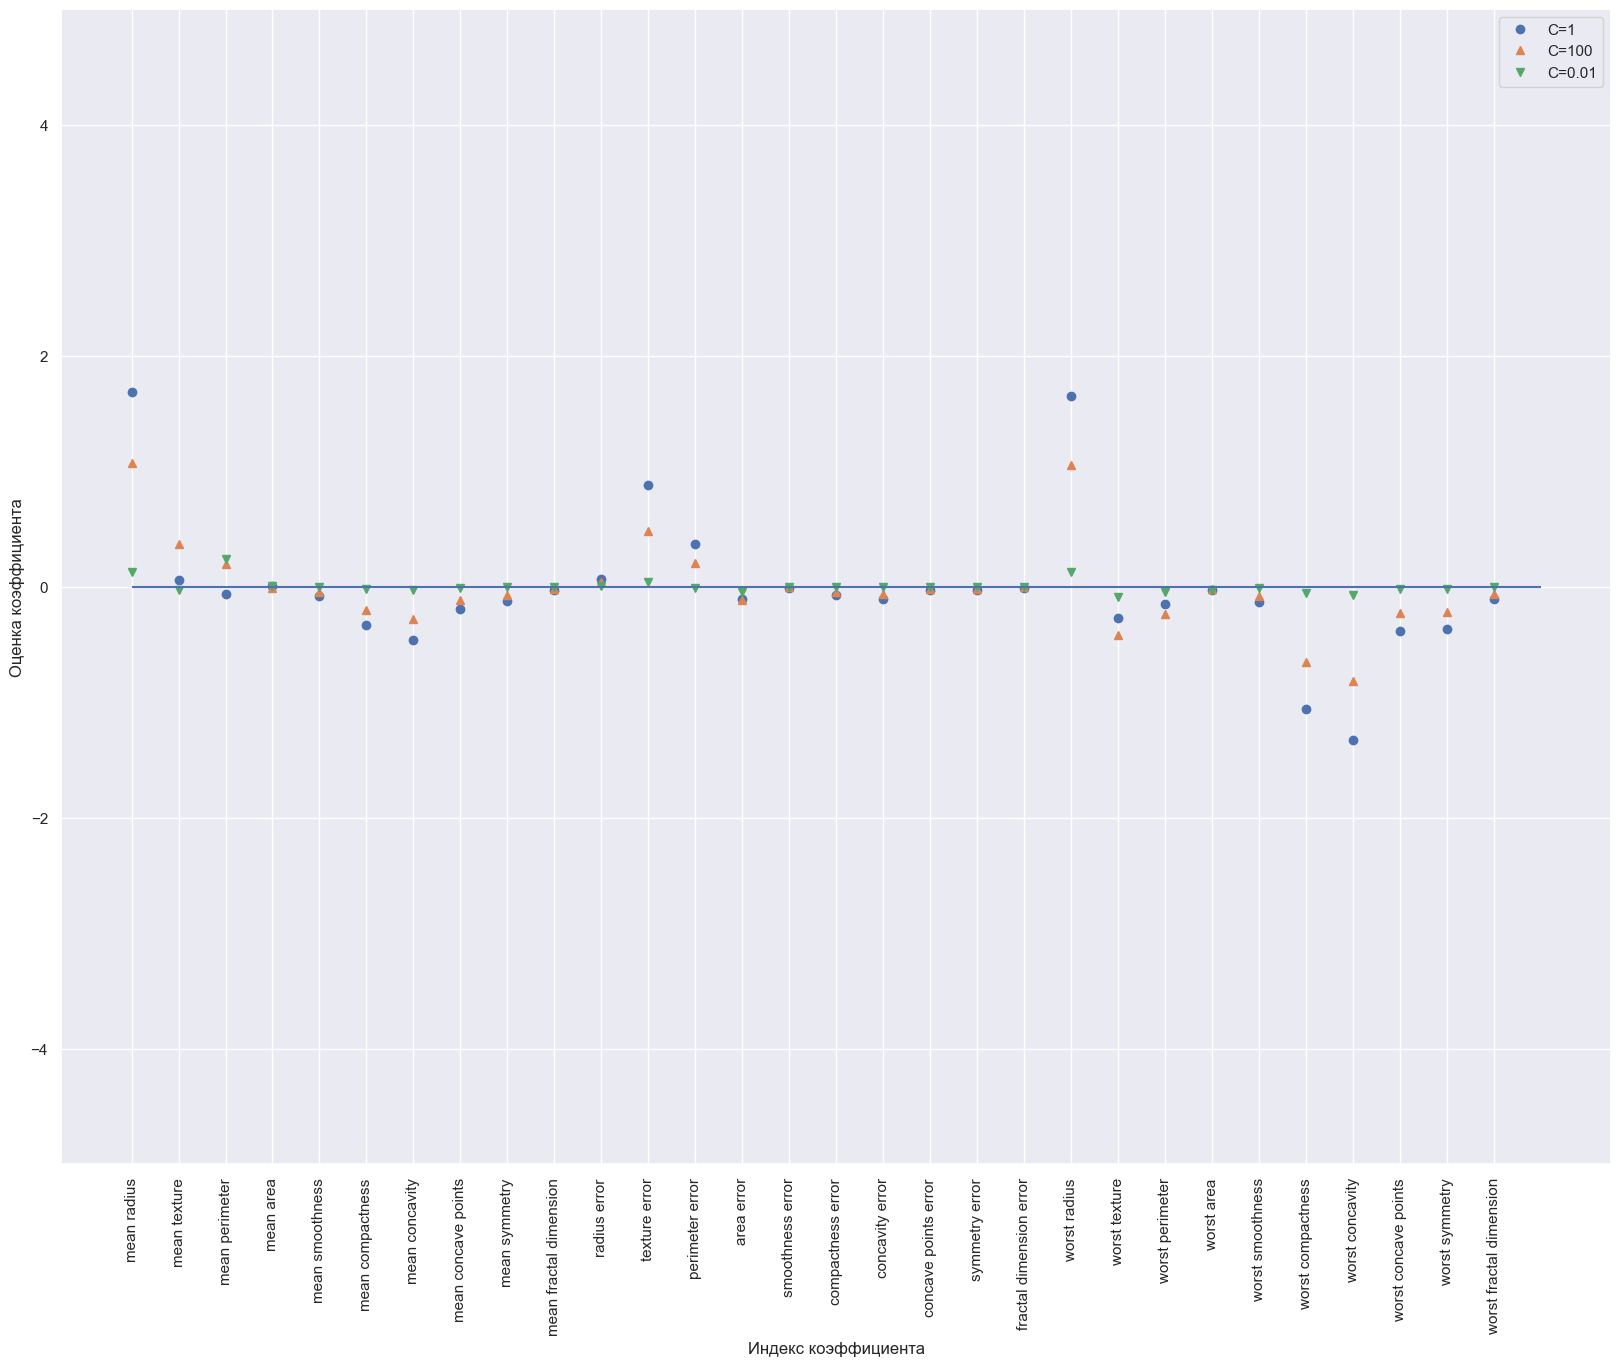

In [84]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg01.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()

Правильность на обучении для логрегрессии l1 с C=0.001: 0.91
Правильность на тесте для логрегрессии l1 с C=0.001: 0.92
Правильность на обучении для логрегрессии l1 с C=1.000: 0.96
Правильность на тесте для логрегрессии l1 с C=1.000: 0.96


/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Правильность на обучении для логрегрессии l1 с C=100.000: 0.99
Правильность на тесте для логрегрессии l1 с C=100.000: 0.98


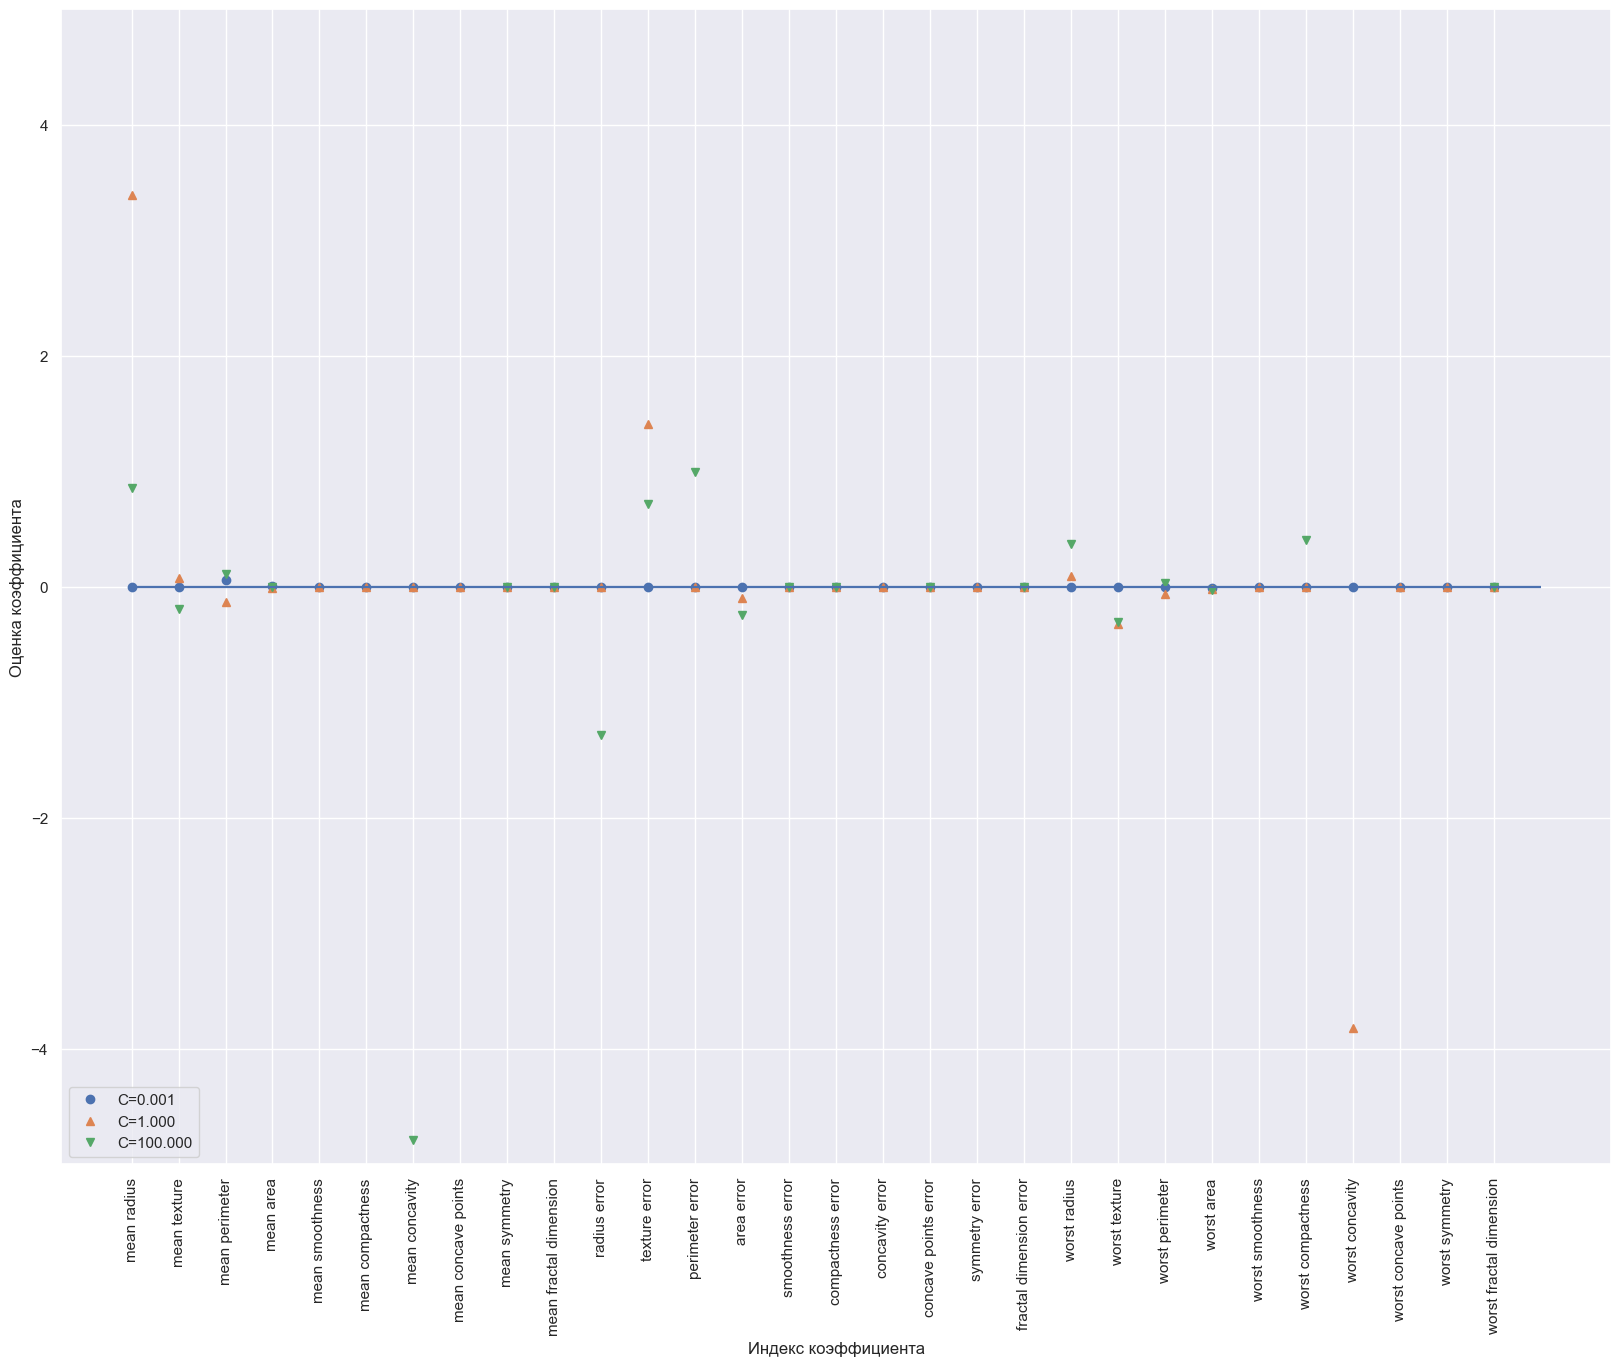

In [85]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Правильность на обучении для логрегрессии l1 с C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Правильность на тесте для логрегрессии l1 с C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
    plt.hlines(0, 0, cancer.data.shape[1])
    plt.xlabel("Индекс коэффициента")
    plt.ylabel("Оценка коэффициента")
    plt.ylim(-5, 5)
    plt.legend(loc=3)

# Линейные модели для мультиклассовой классификации

In [86]:
from sklearn.datasets import make_blobs

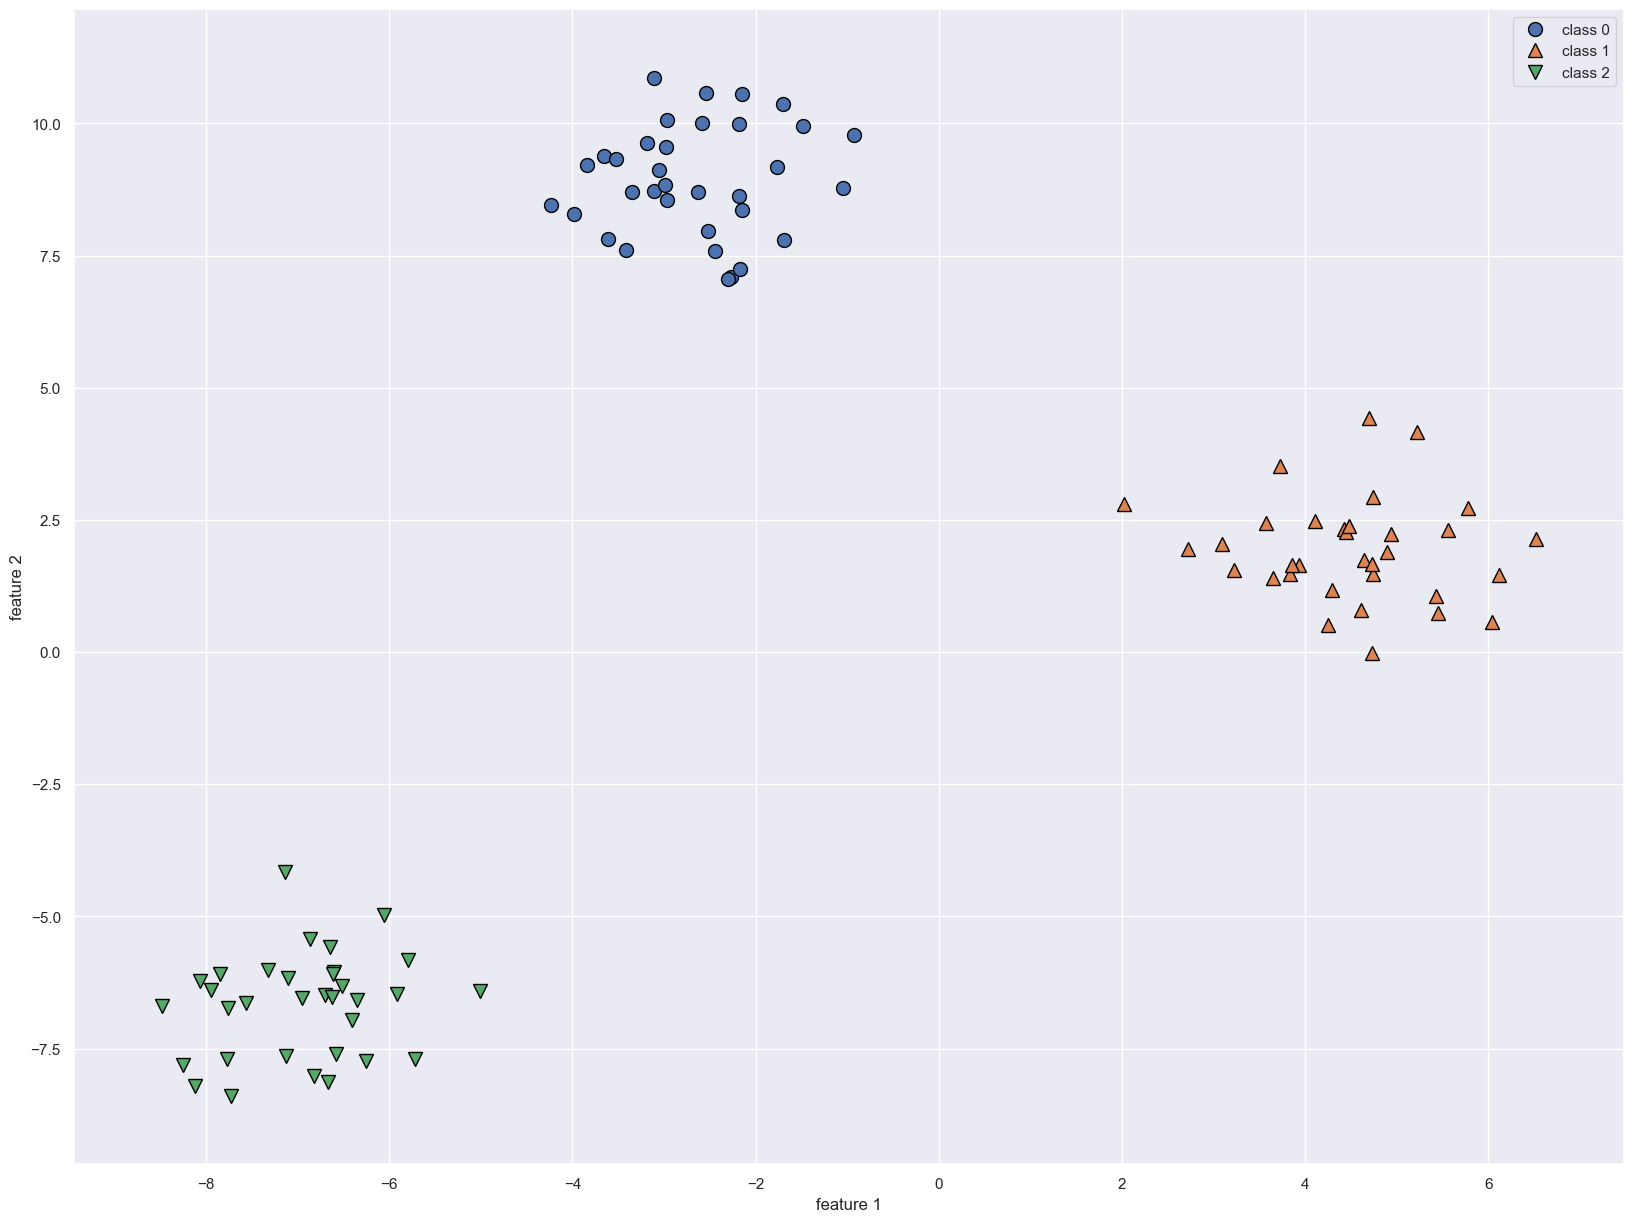

In [87]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['class 0', 'class 1', 'class 2'])

In [88]:
linear_svm = LinearSVC().fit(X, y)

In [89]:
linear_svm.coef_.shape

(3, 2)

In [90]:
linear_svm.intercept_.shape

(3,)

In [91]:
linear_svm.coef_

array([[-0.17492599,  0.23140887],
       [ 0.4762149 , -0.06937513],
       [-0.1891455 , -0.20399704]])

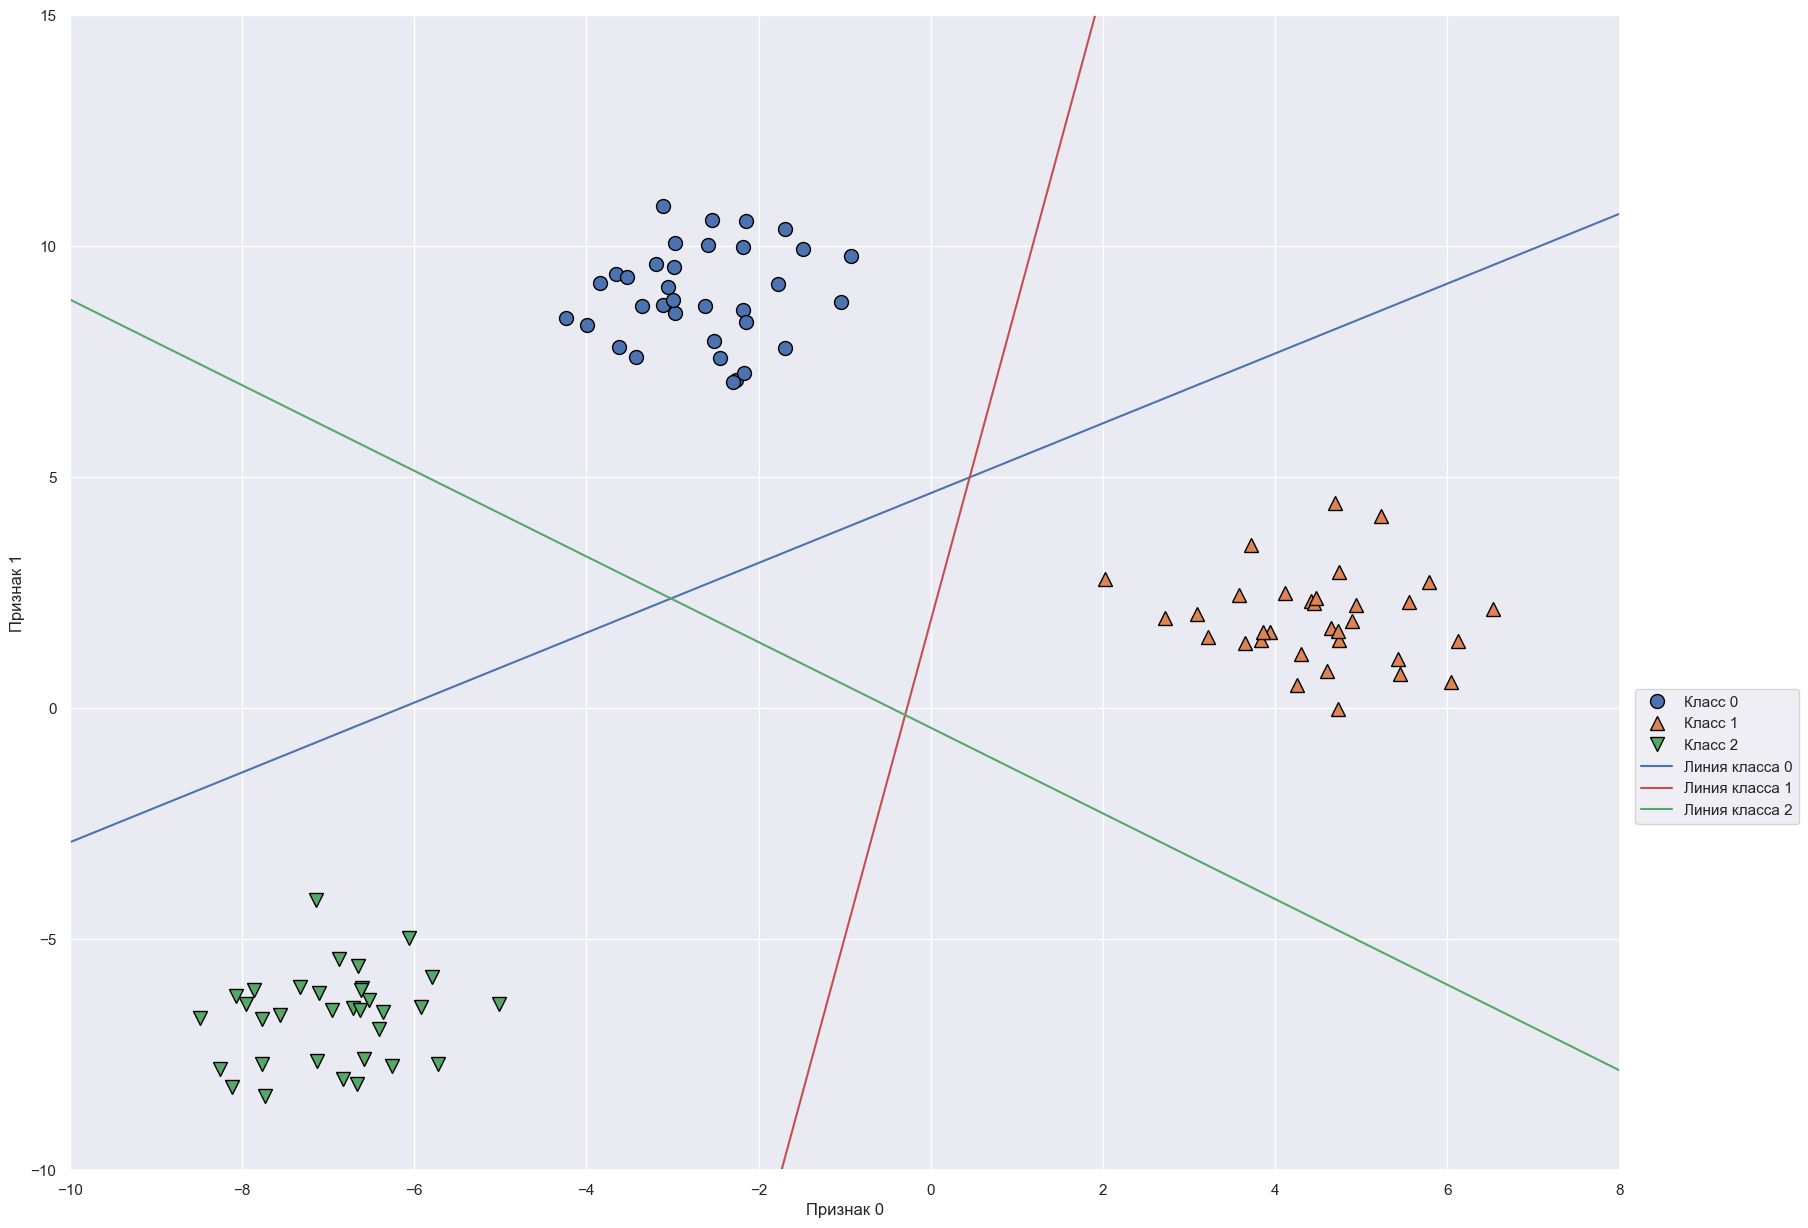

In [92]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
 'Линия класса 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Признак 1')

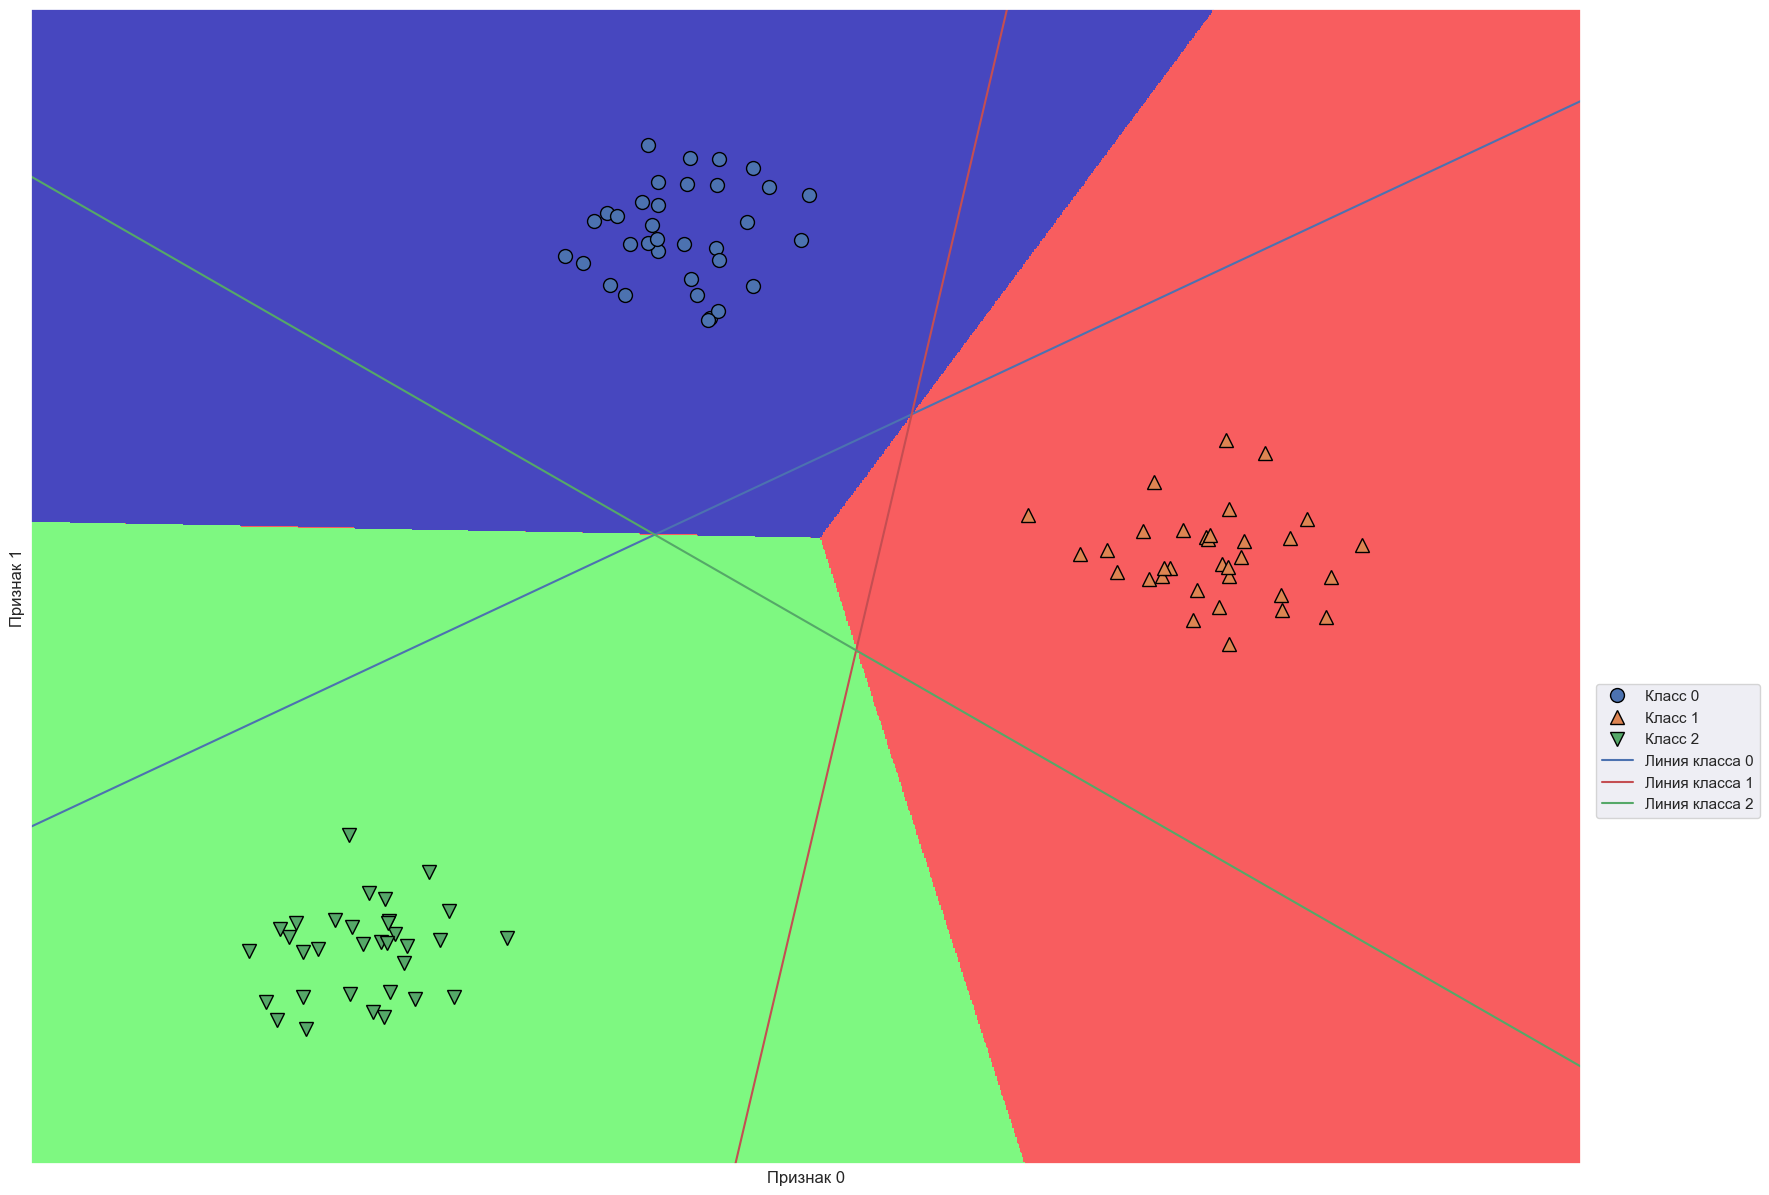

In [93]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
 'Линия класса 2'], loc=(1.01, 0.3))
plt.xlabel("Признак 0")
plt.ylabel("Признак 1") 

# Наивные байесовские классификаторы

Есть три вида в sklearn :
## GaussianNB 
from sklearn.naive_bayes import GaussianNB

Применяется к непрерывным данным
## BernoulliNB
Применяется в бинарным данным (текстовые данные)
## MultinominalNB
Применяется к дискретным данным (текстовые данные)


# Деревья решений

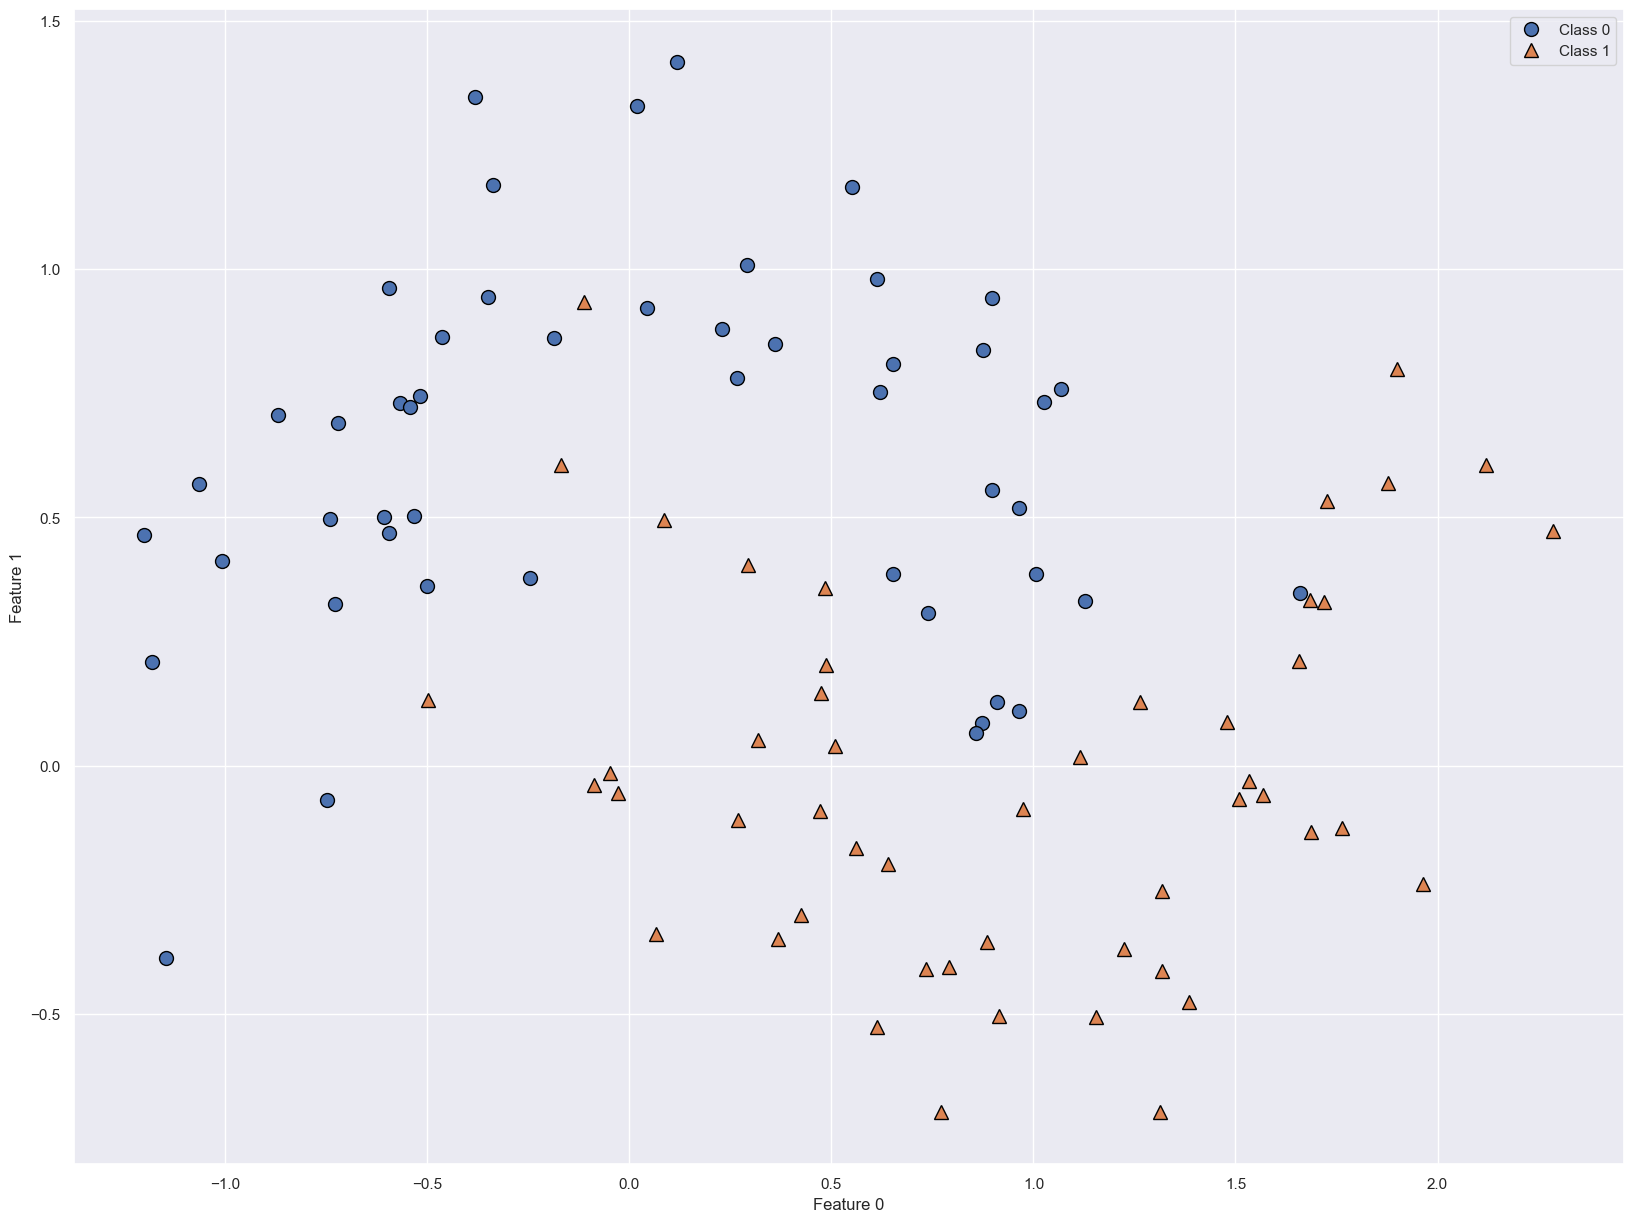

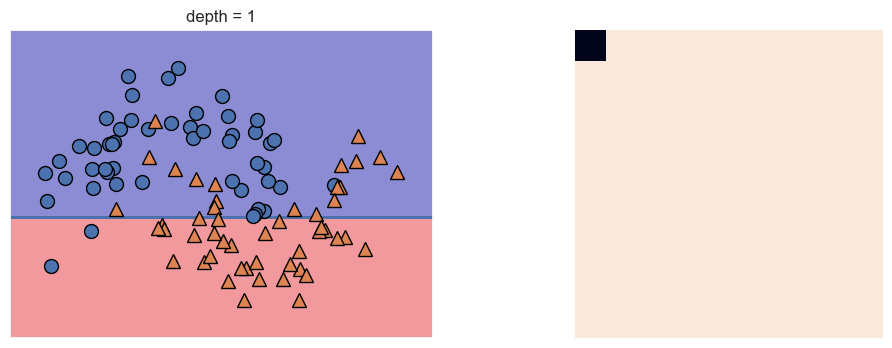

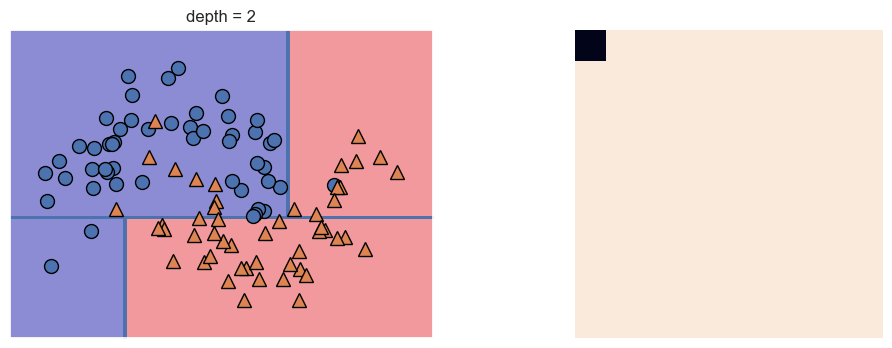

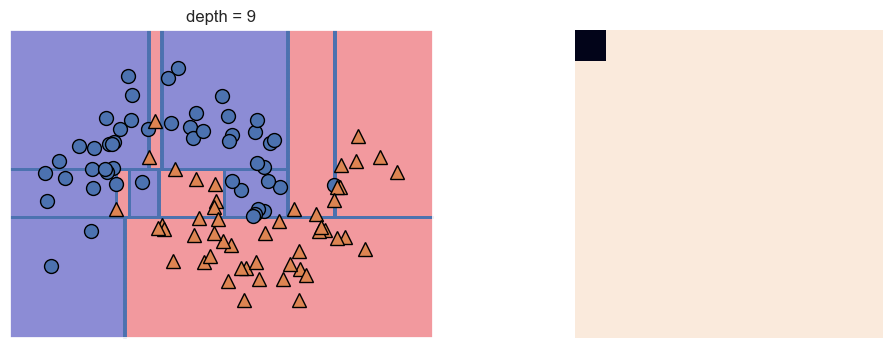

In [94]:
mglearn.plots.plot_tree_progressive()

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [96]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [97]:
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [98]:
tree.score(X_train, y_train)

1.0

In [99]:
tree.score(X_test, y_test)

0.9370629370629371

In [100]:
tree4 = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)

In [101]:
tree4.score(X_train, y_train)

0.9882629107981221

In [102]:
tree4.score(X_test, y_test)

0.951048951048951

In [103]:
tree.plot_tree(tree4, feature_names=cancer.feature_names)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'plot_tree'

In [104]:
seria = pd.Series({i: n for i,n in zip(cancer.feature_names, tree4.feature_importances_)}).sort_values()

In [105]:
sns.barplot(x='index',y='values', data=seria[seria['values'] > 0])

KeyError: 'values'

# Ансамбли деревьев решений (ensembles)

# RandomForest

В общем, лучше взять за правило использовать значения, выставленные по умолчанию:
### max_features=sqrt(n_features) для классификации 
### max_features=n_features для регрессии.

Увеличение значений
max_features или max_leaf_nodes иногда может повысить качество модели. Кроме того, оно может резко снизить требования к пространству
на диске и времени вычислений в ходе обучения и прогнозирования
### n_estimators, большее значение всегда дает лучший результат

# Градиентный бустинг деревьев регрессии     (метод градиентного бустинга)

Его можно использовать для регрессии и классификации

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [108]:
gbrt = GradientBoostingClassifier(random_state=0)

In [109]:
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [110]:
gbrt.score(X_train, y_train)

1.0

In [111]:
gbrt.score(X_test, y_test)

0.958041958041958

Мы видим переобучение модели! Снизим глубину дерева

In [112]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)

In [113]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)

In [114]:
gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train)

0.9953051643192489

In [115]:
gbrt.score(X_test, y_test)

0.965034965034965

In [116]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)

In [117]:
gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train)

0.9953051643192489

In [118]:
gbrt.score(X_test, y_test)

0.9440559440559441

Как и ожидалось, эти методы, направленные на уменьшение
сложности модели, снижают правильность на обучающем наборе. В
данном случае снижение максимальной глубины деревьев значительно
улучшило модель, тогда как скорость обучения лишь незначительно
повысило обобщающую способность.

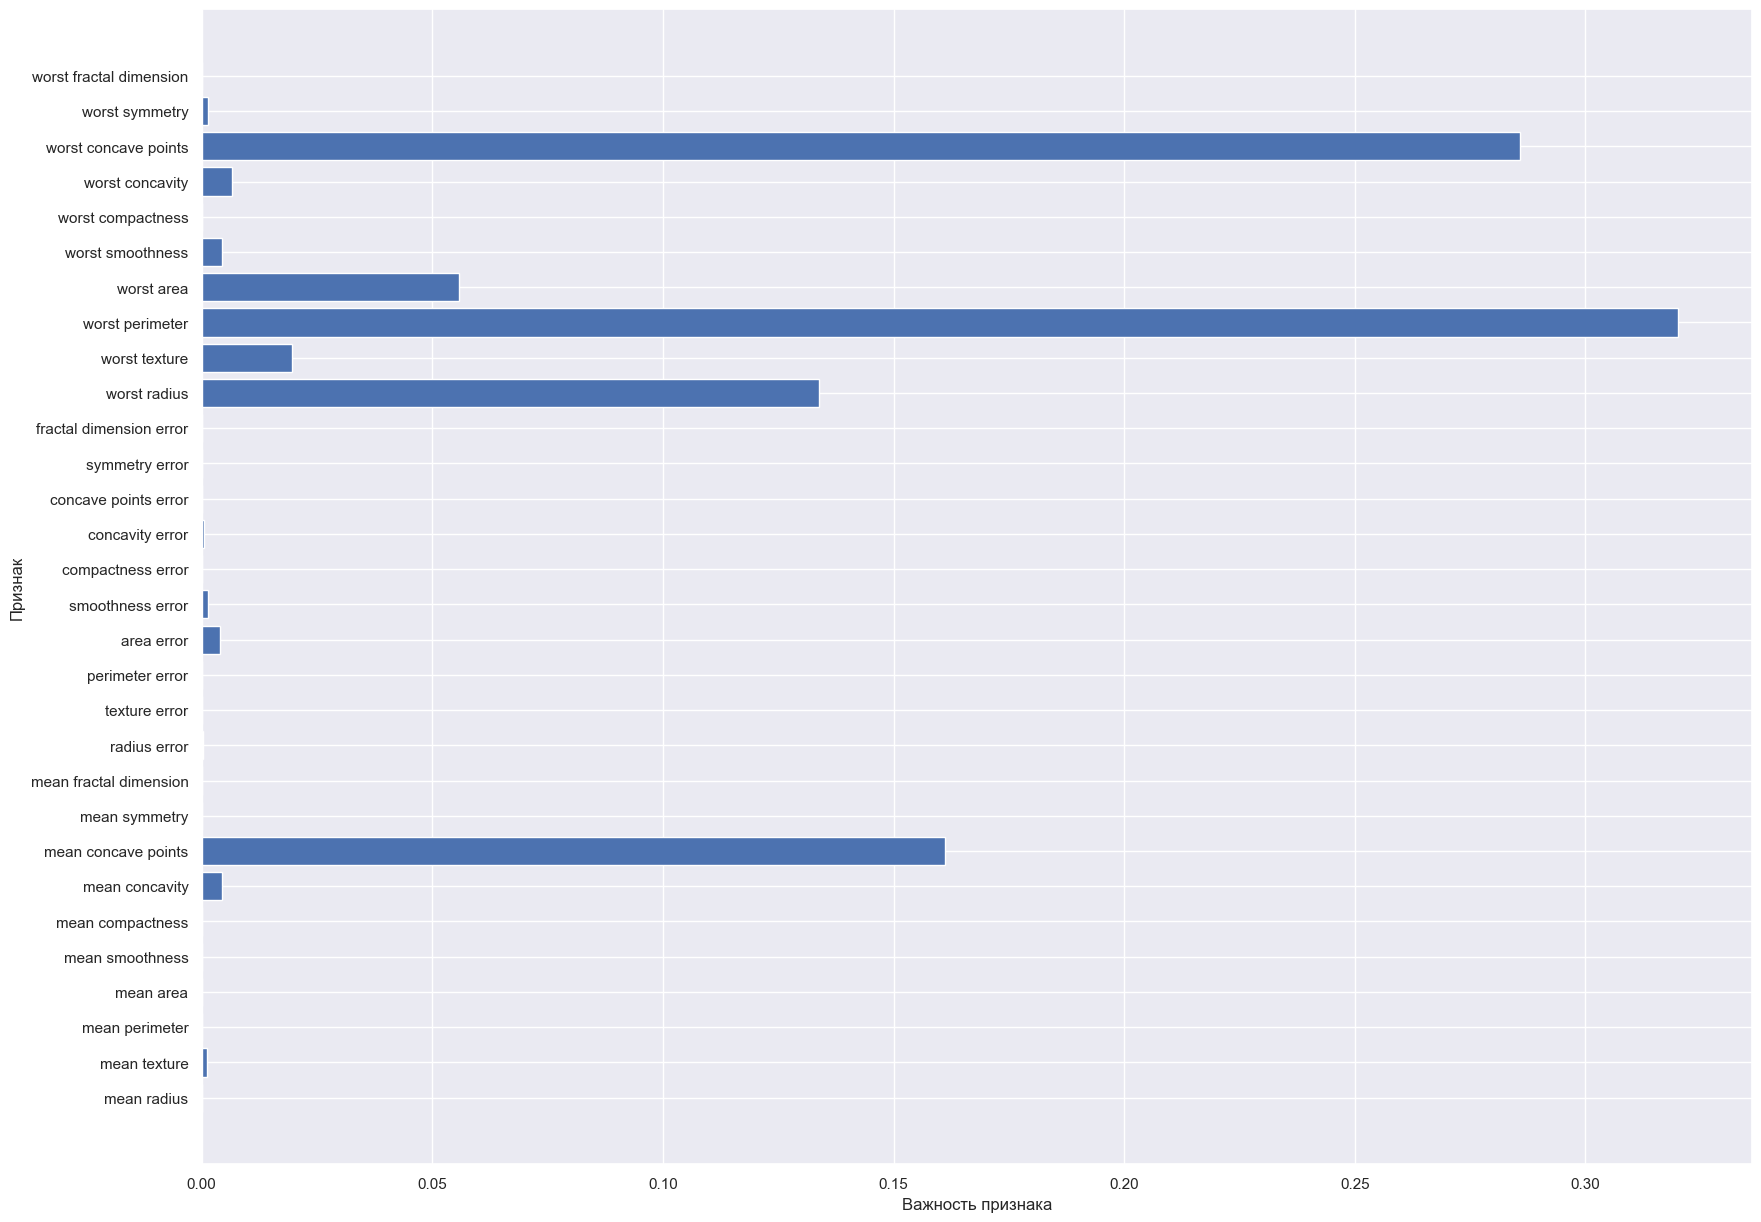

In [119]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(gbrt)

# Ядерный метод опроных векторов

In [120]:
from sklearn.svm import LinearSVC

In [121]:
X, y = make_blobs(centers=4, random_state=8)

In [122]:
y = y % 2

In [123]:
y

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

Text(0, 0.5, 'Признак 1')

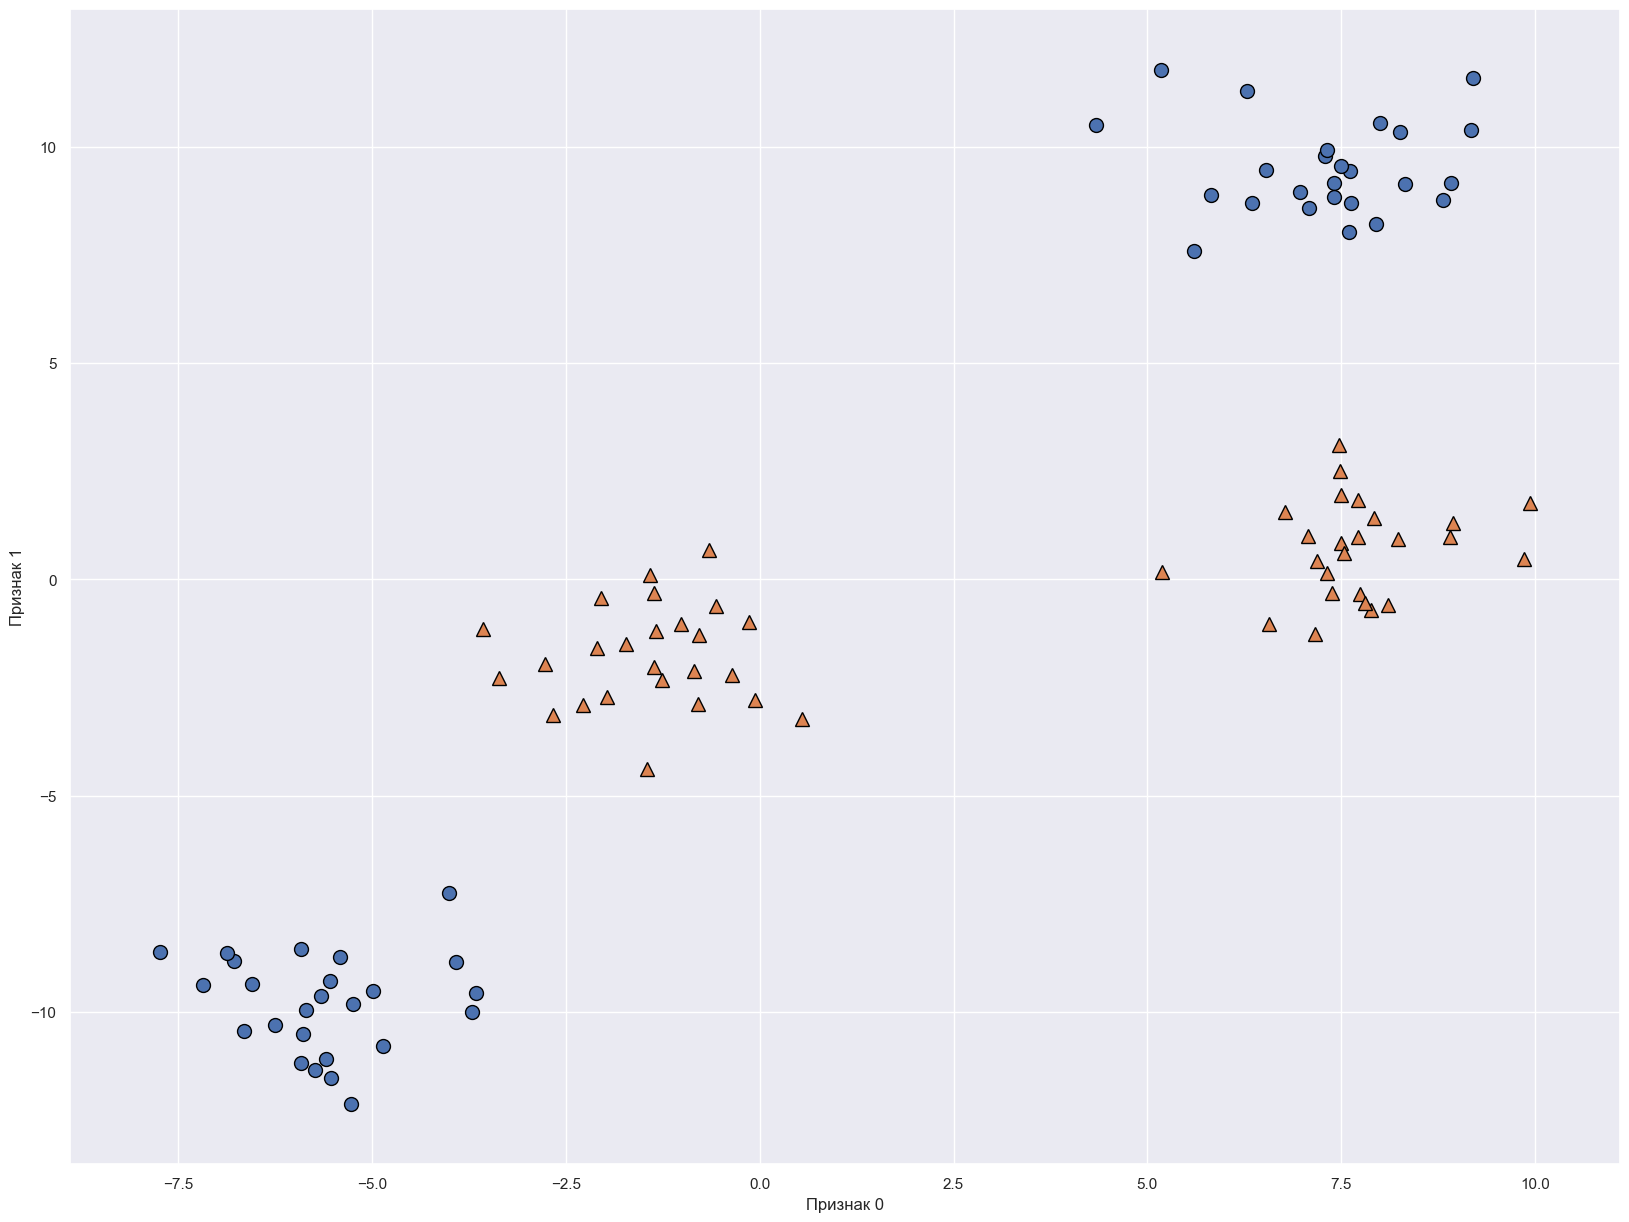

In [124]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

In [125]:
df = pd.DataFrame(X)

In [126]:
df['class'] = y

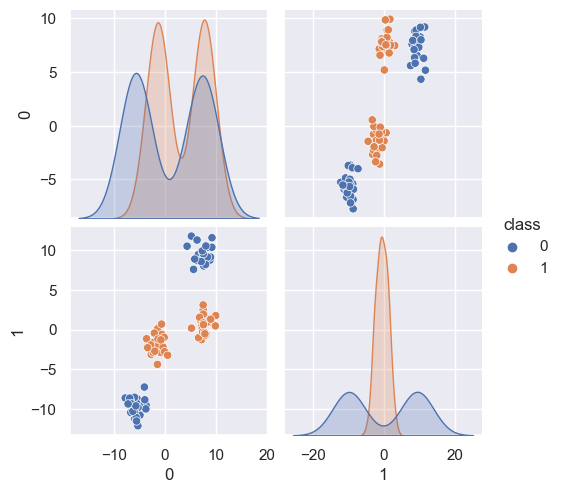

In [127]:
sns.pairplot(df, hue='class')

In [128]:
X_new = np.hstack([X, X[:, 1:] ** 2])

/var/folders/zz/zyxvpxvq6csfxvn_n003vq4000yxs0/T/ipykernel_38335/543483079.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'признак1 ** 2')

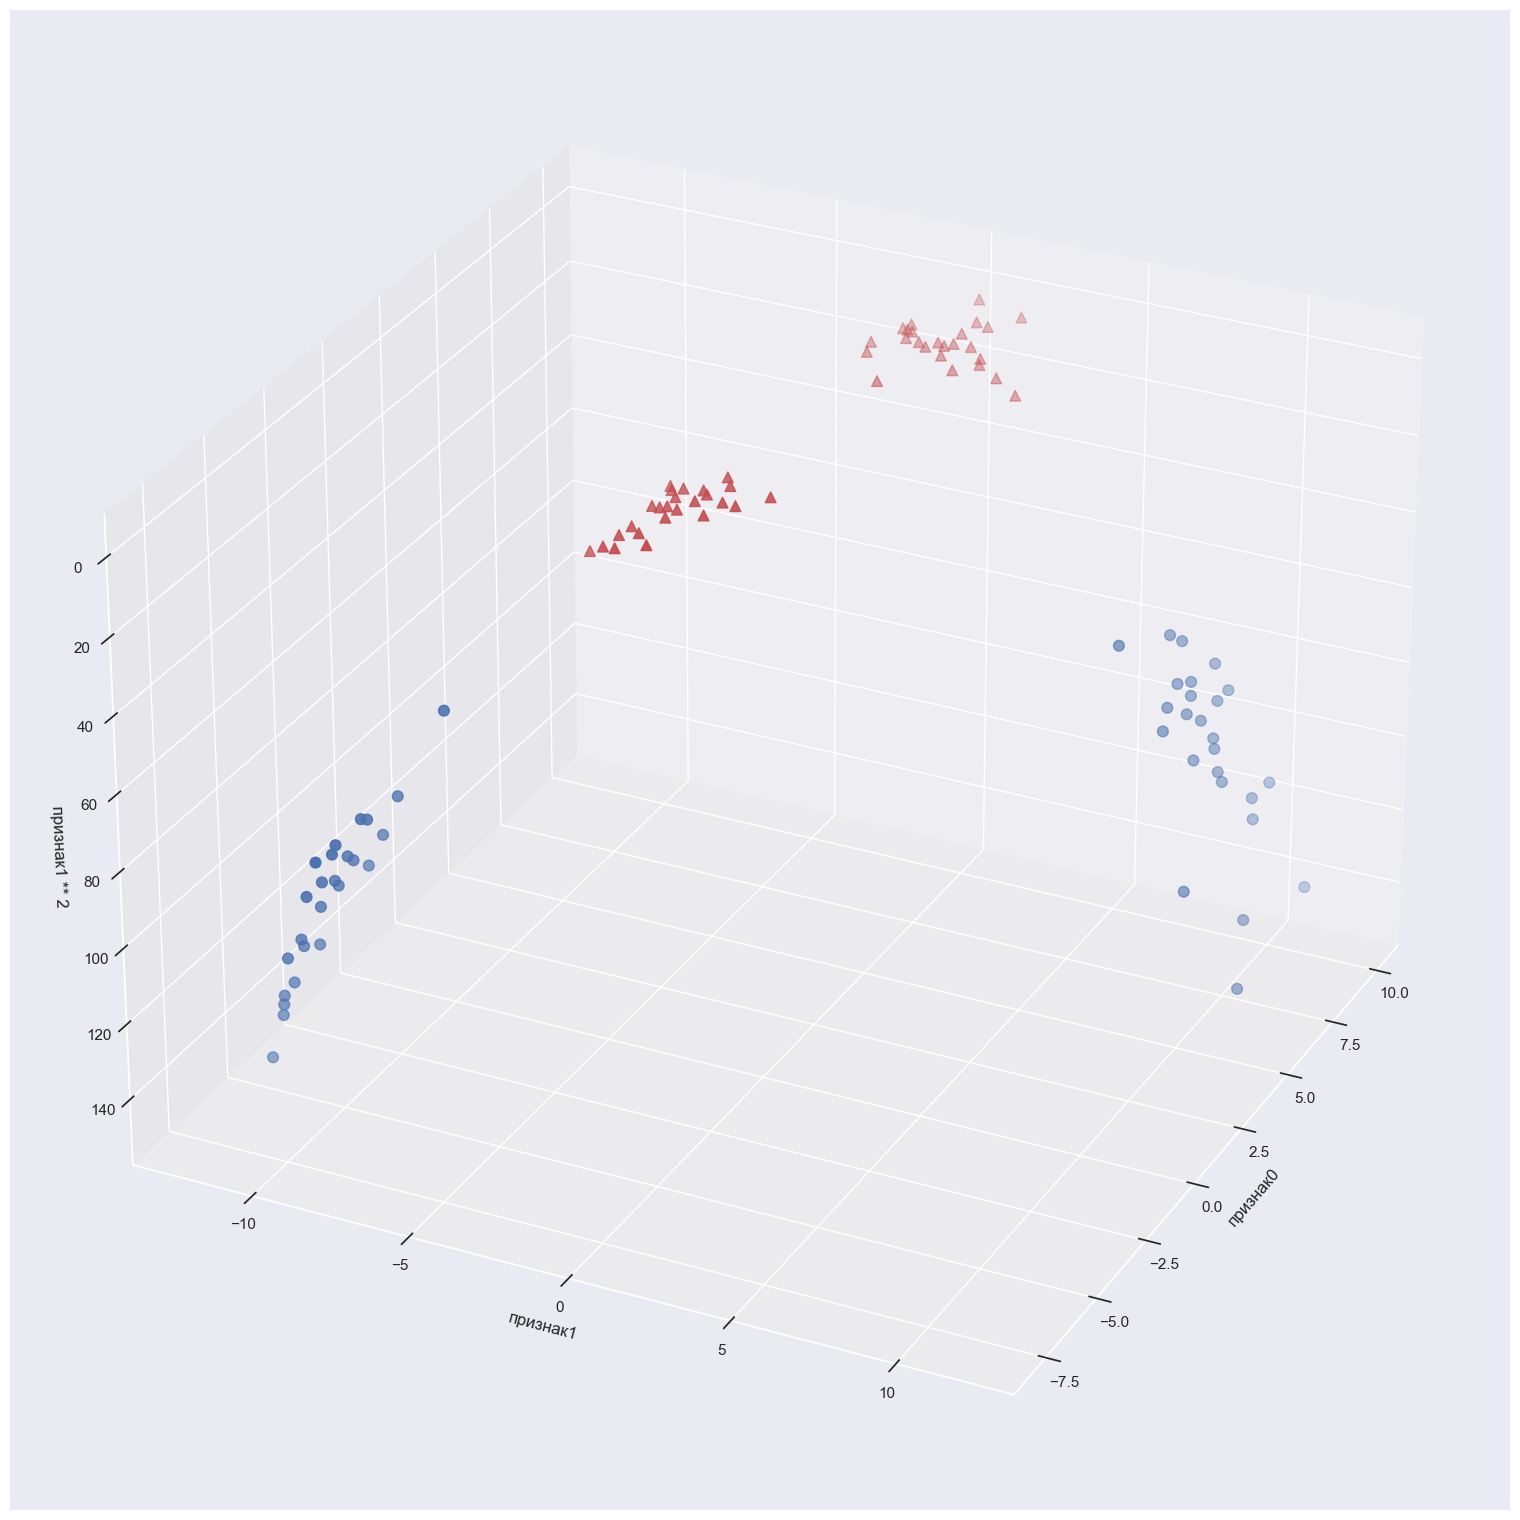

In [129]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# визуализируем в 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# сначала размещаем на графике все точки с y == 0, затем с y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("признак0")
ax.set_ylabel("признак1")
ax.set_zlabel("признак1 ** 2")

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/zz/zyxvpxvq6csfxvn_n003vq4000yxs0/T/ipykernel_38335/3040564793.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-46)


Text(0.5, 0, 'признак1 ** 2')

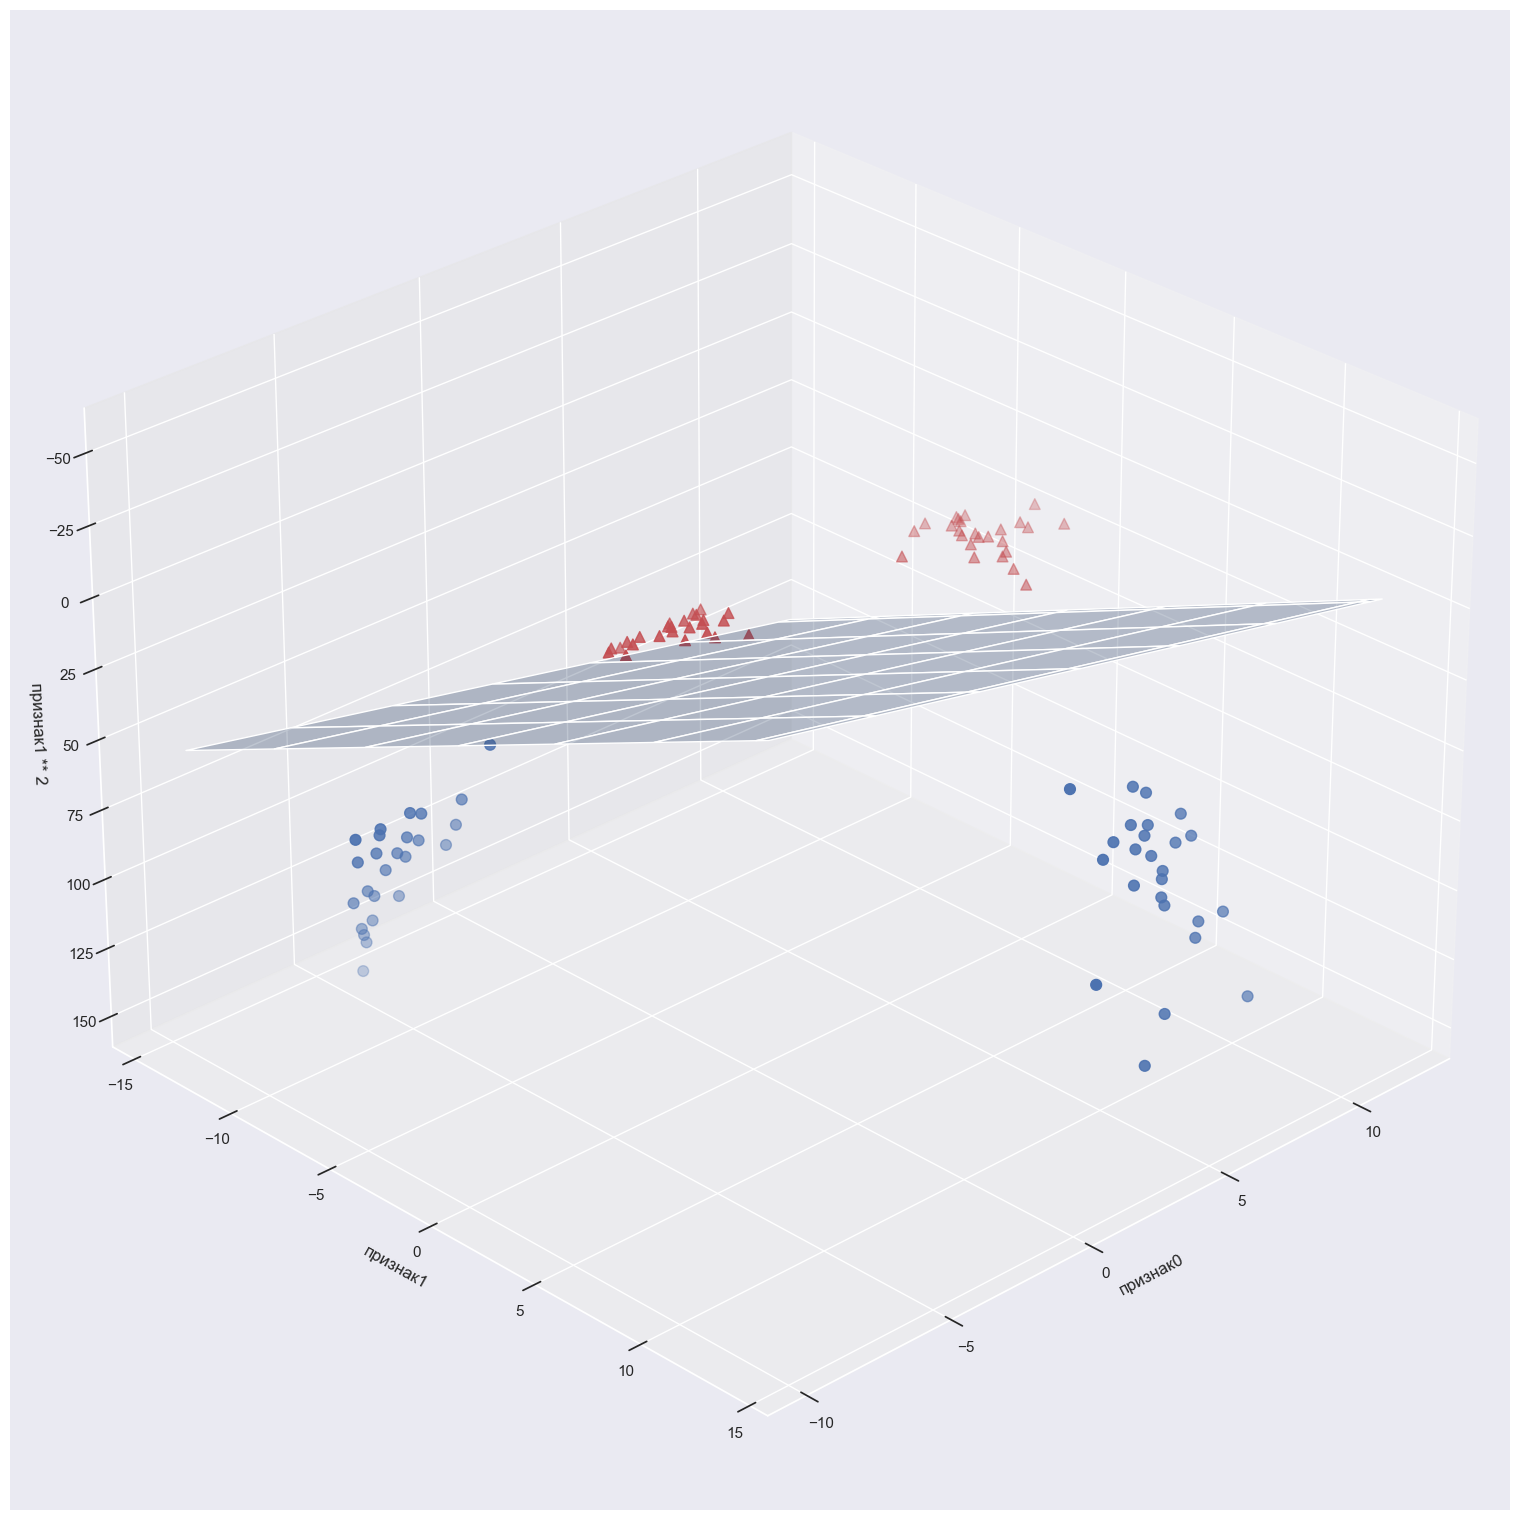

In [132]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# показать границу принятия решений линейной модели
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-46)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("признак0")
ax.set_ylabel("признак1")
ax.set_zlabel("признак1 ** 2")

# Настройка SVM
Параметр gamma – это параметр формулы, приведенной в предыдущем
разделе. Он регулирует ширину гауссовского ядра. Параметр gamma
задает масштаб расстояний между точками. Параметр С представляет
собой параметр регуляризации, аналогичный тому, что использовался в
линейных моделях. Он ограничивает важность каждой точки (точнее, ее
dual_coef_).

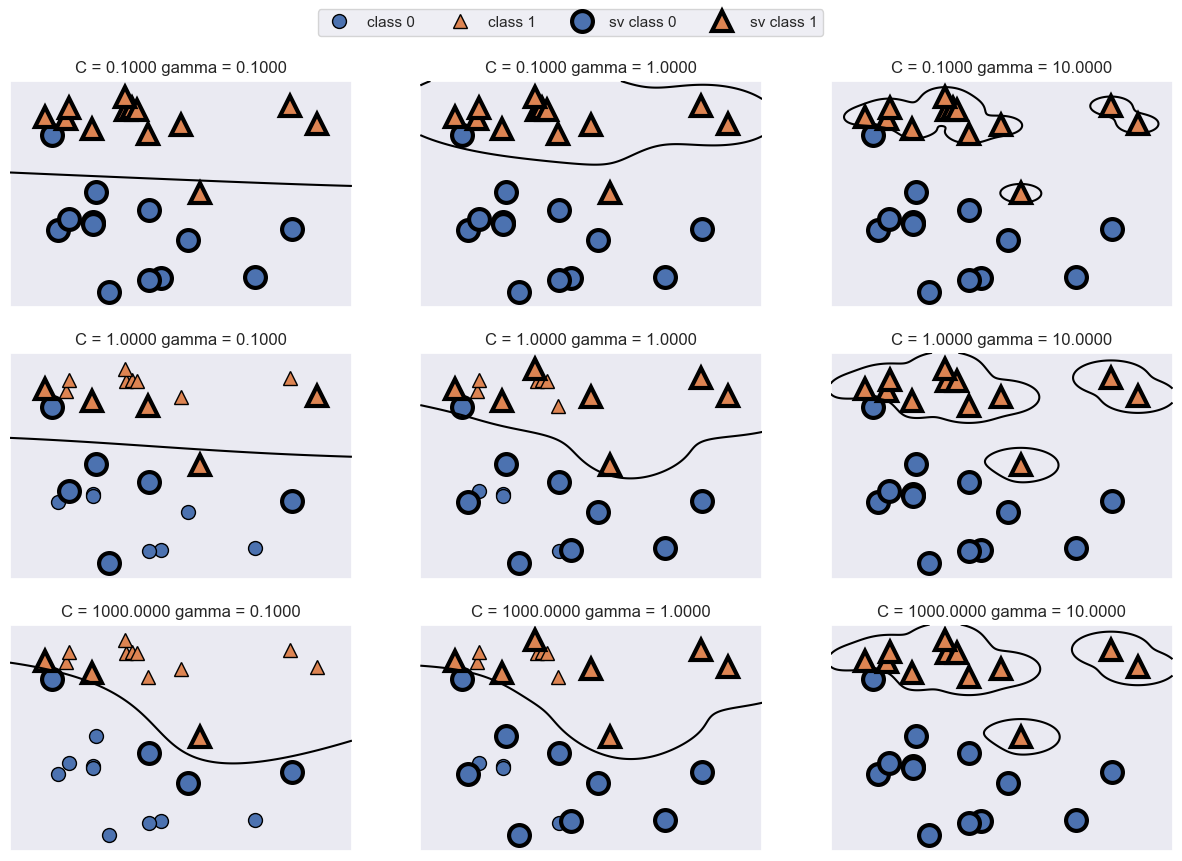

In [133]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
 ncol=4, loc=(.9, 1.2))

# Нейронные сети  (Deep Learning)

In [138]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25,random_state=3)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [143]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Признак 1')

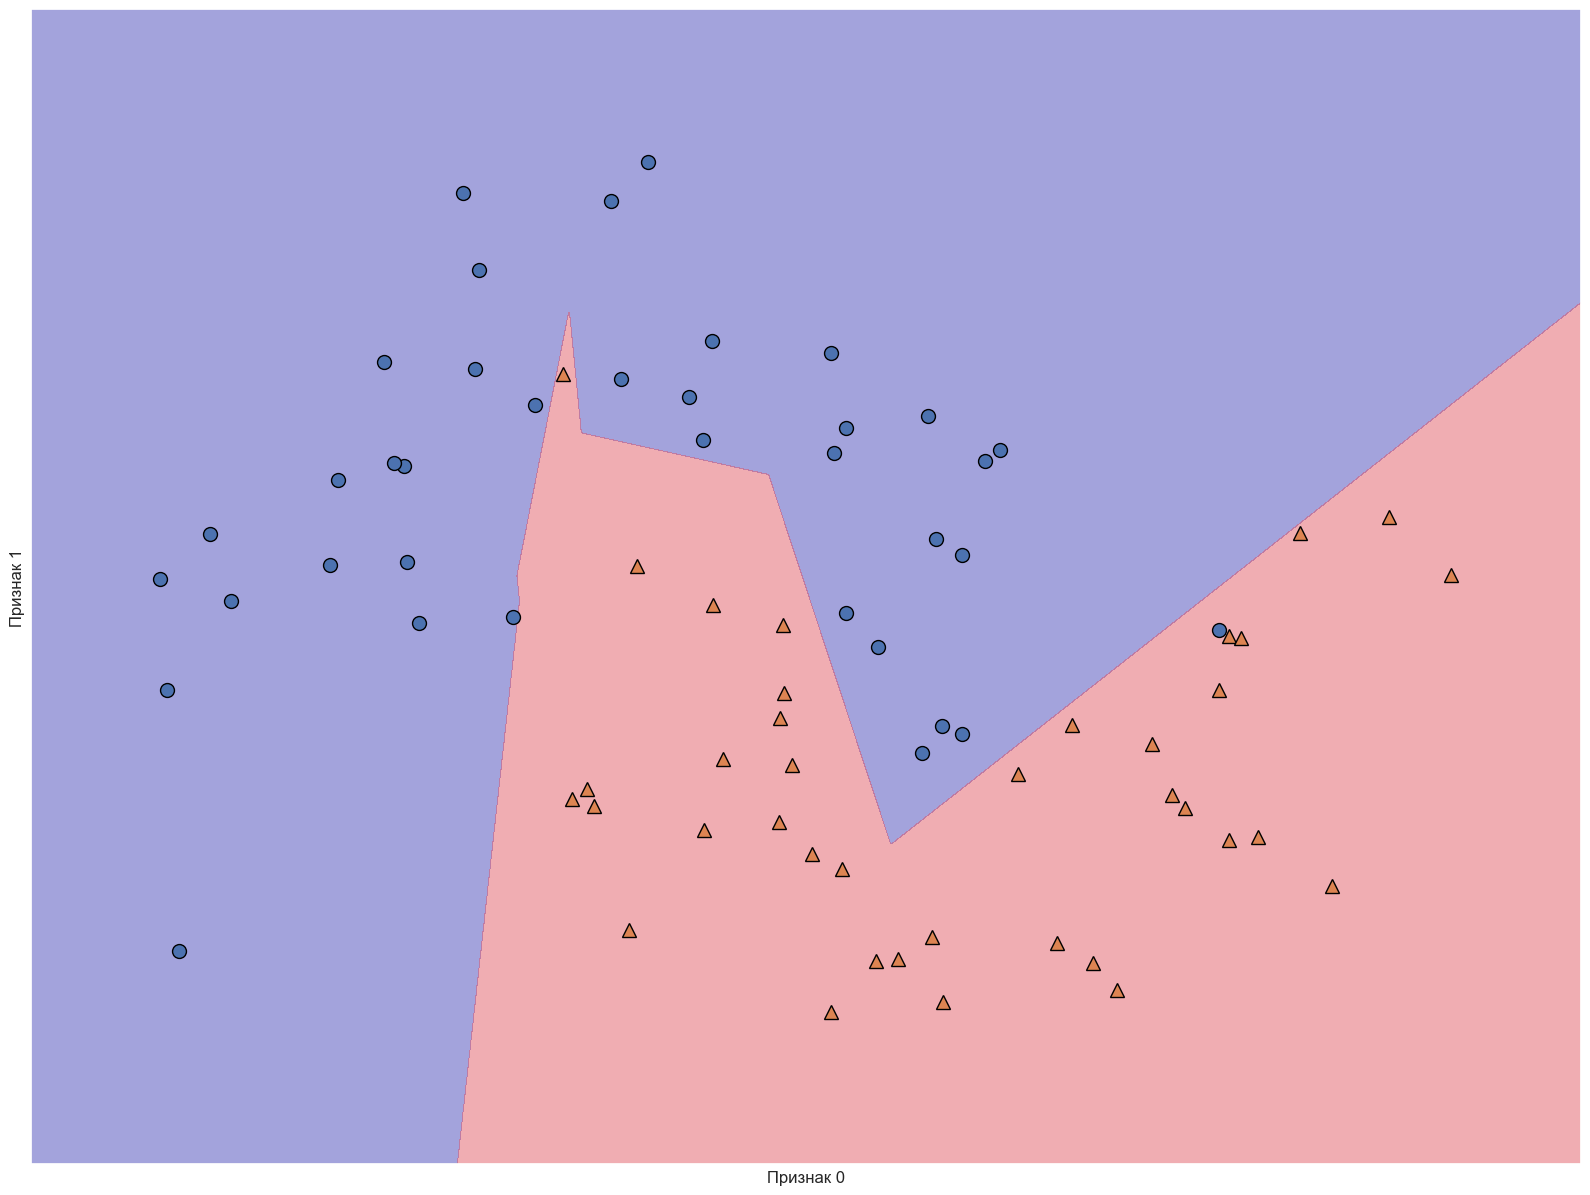

In [144]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

Text(0, 0.5, 'Признак 1')

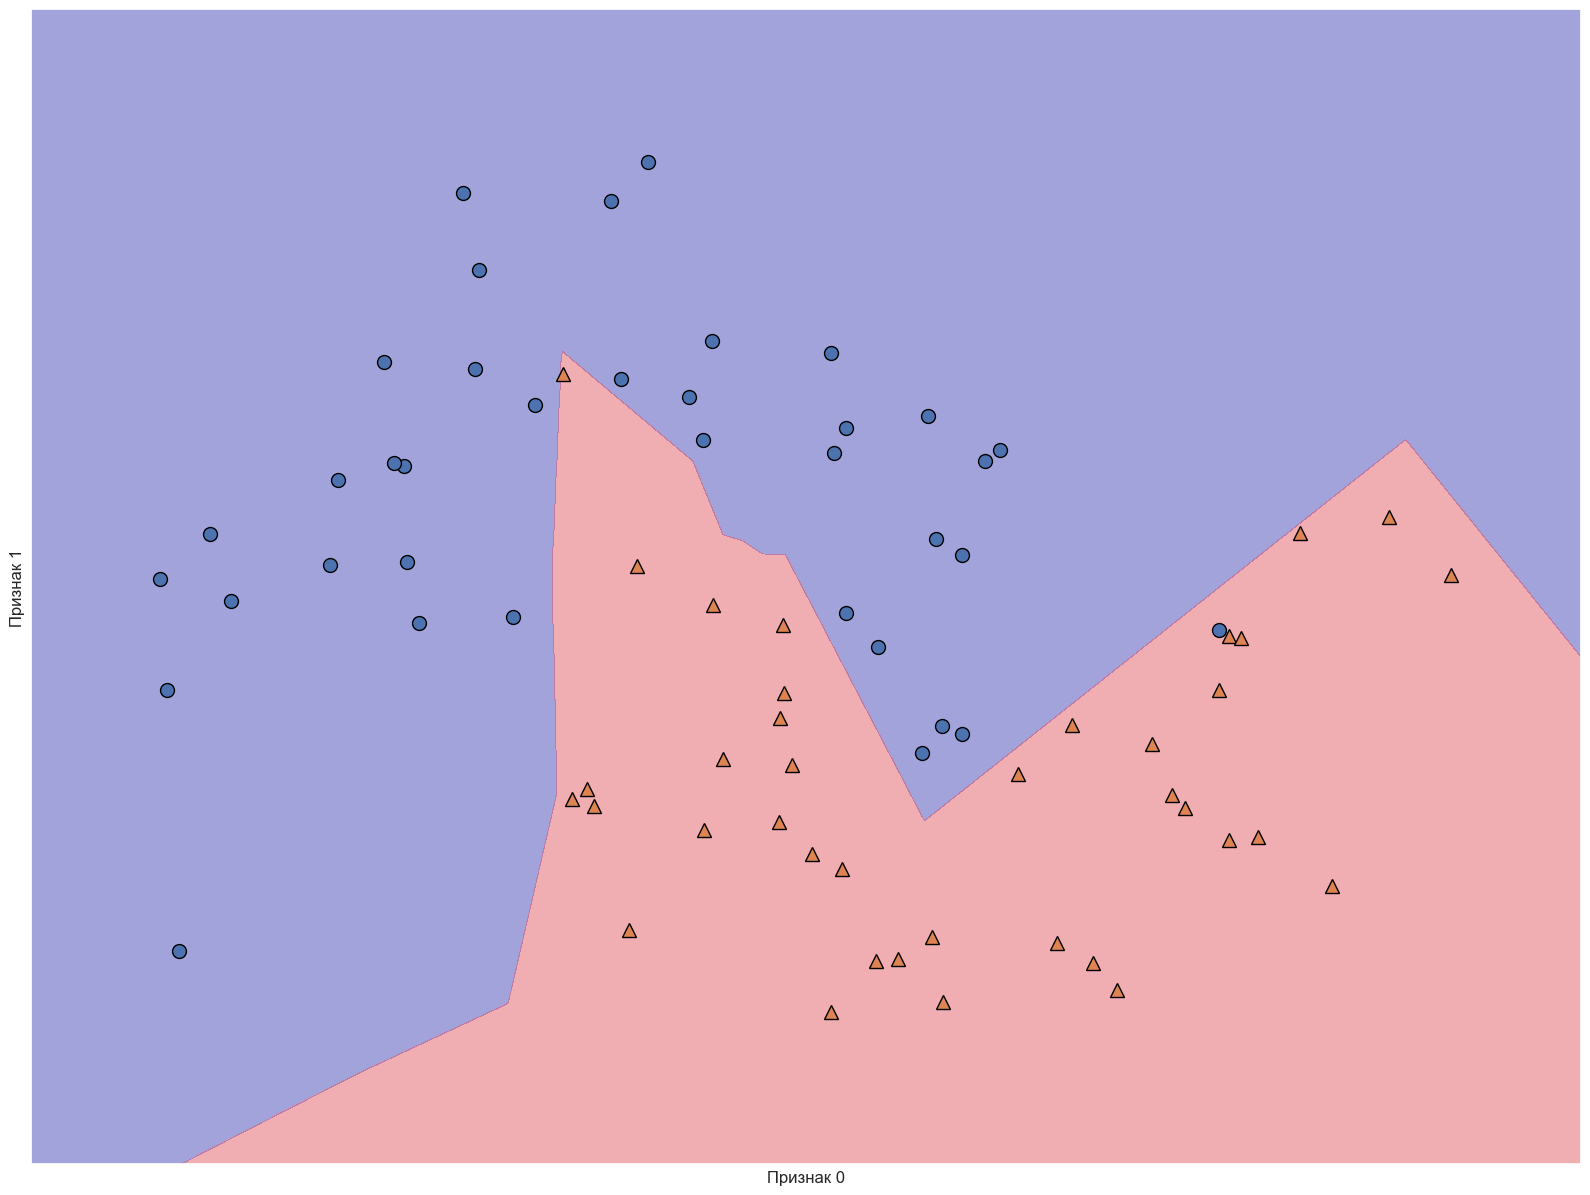

In [145]:
# использование двух скрытых слоев по 10 элементов в каждом
mlp = MLPClassifier(solver='lbfgs', random_state=0,
 hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Признак 1')

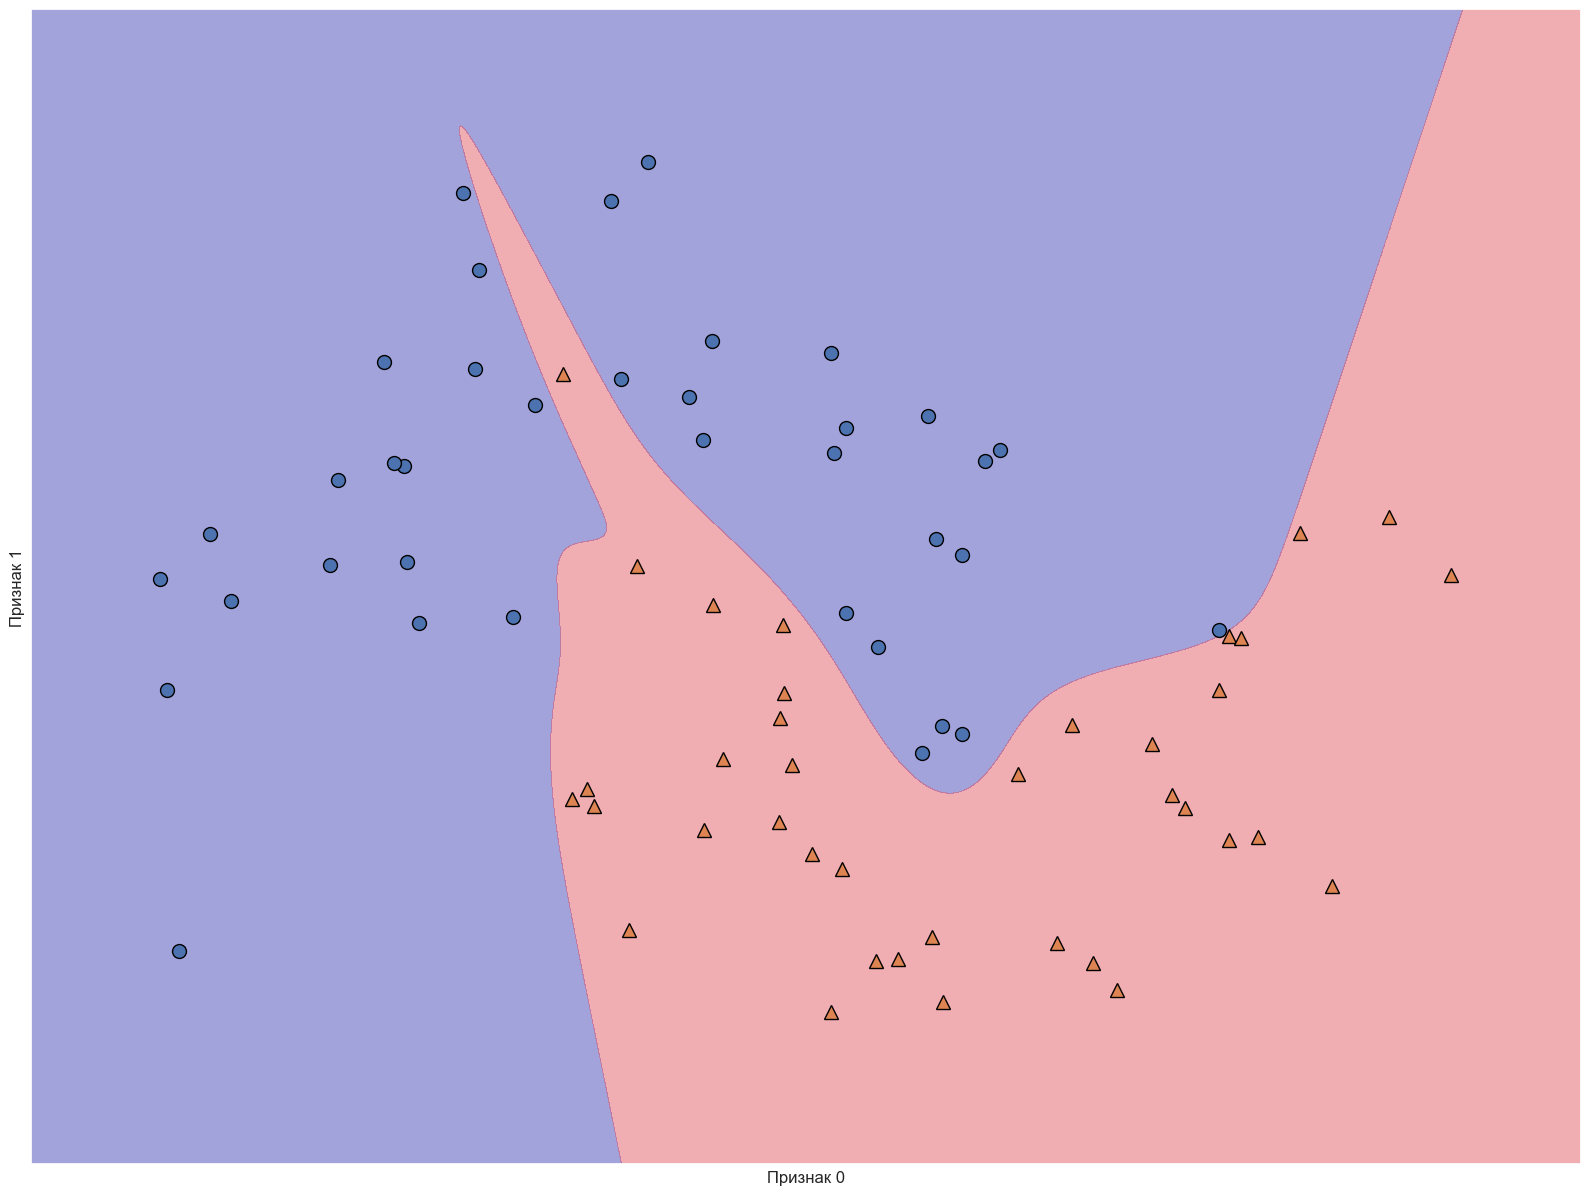

In [146]:
# использование двух скрытых слоев по 10 элементов в каждом, на этот раз с функцией tanh
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
 random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


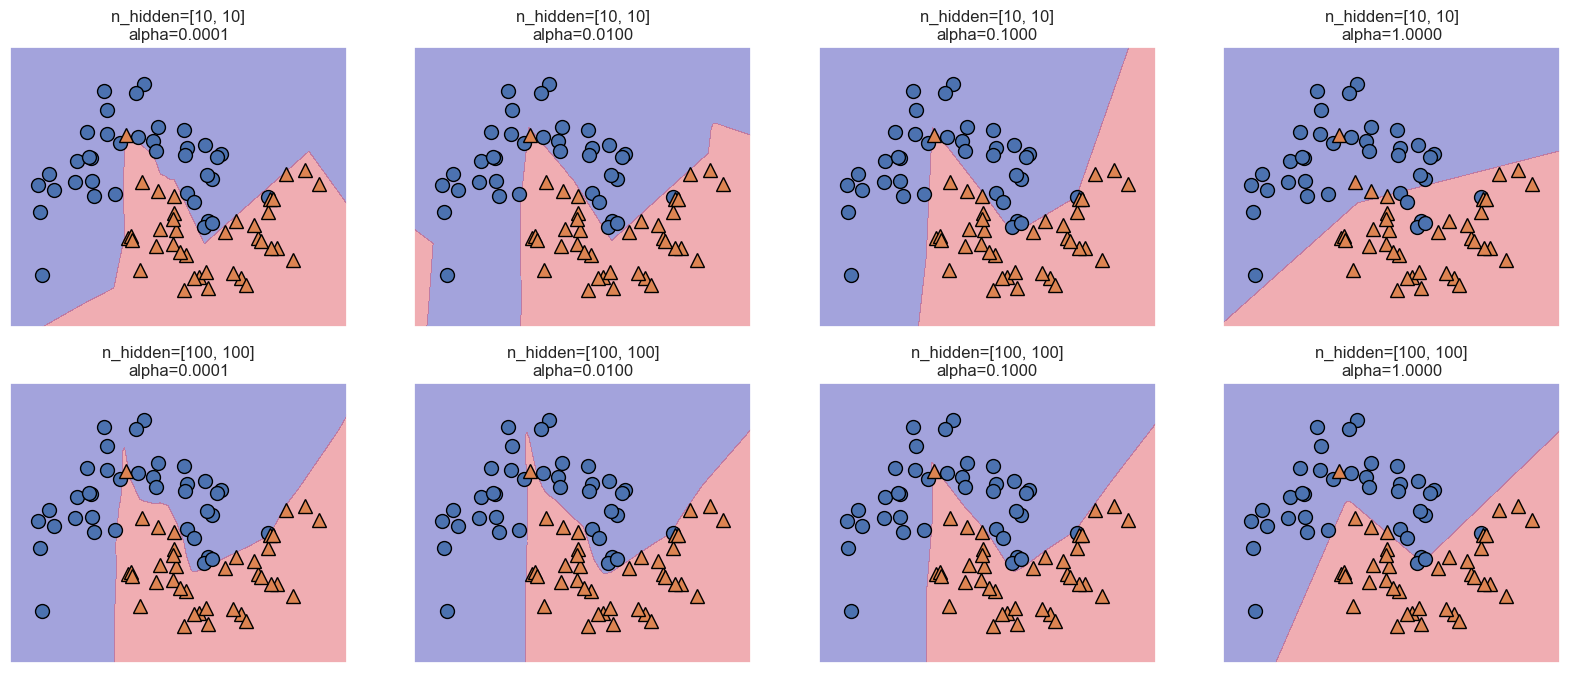

In [151]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
        hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
        alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
        n_hidden_nodes, n_hidden_nodes, alpha))

In [153]:
cancer.data.max(axis=0)

array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 3.454e-01,
       4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
       2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
       7.895e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
       2.226e-01, 1.058e+00, 1.252e+00, 2.910e-01, 6.638e-01, 2.075e-01])

In [156]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [179]:
mlp = MLPClassifier(random_state=42, max_iter=1000, alpha=1)

In [158]:
mlp.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [159]:
mlp.score(X_train, y_train)

0.9389671361502347

In [160]:
mlp.score(X_test, y_test)

0.916083916083916

In [169]:
mean_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)

In [170]:
X_train_scaled = (X_train - mean_train) / std_train

In [171]:
X_test_scaled = (X_test - mean_train) / std_train

In [180]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(alpha=1, max_iter=1000, random_state=42)

In [181]:
mlp.score(X_train_scaled, y_train)

0.9882629107981221

In [182]:
mlp.score(X_test_scaled, y_test)

0.986013986013986

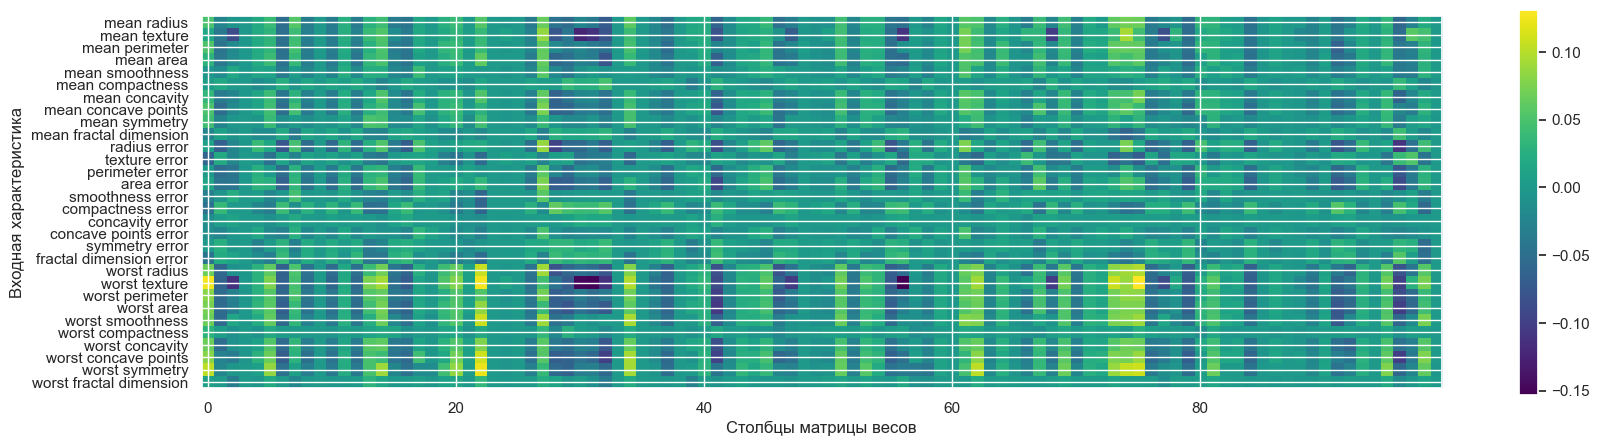

In [183]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Столбцы матрицы весов")
plt.ylabel("Входная характеристика")
plt.colorbar()

In [188]:
len(mlp.coefs_)

2

In [204]:
mlp.coefs_[0]

array([[ 4.98949103e-02, -2.53745855e-02, -6.06030866e-03, ...,
        -2.74946297e-02,  2.06153199e-02, -8.35603477e-04],
       [ 1.63091399e-02, -3.92464542e-02, -8.59144759e-02, ...,
         5.75724172e-02,  4.66538346e-02,  7.77021378e-05],
       [ 5.13667700e-02, -4.32034732e-02, -1.84705682e-02, ...,
        -2.94920187e-02,  3.28754870e-02, -1.29091671e-03],
       ...,
       [ 7.98910570e-02, -2.72877750e-02, -3.72459285e-02, ...,
        -3.57618969e-02,  7.59053070e-02, -5.27056875e-04],
       [ 1.02576969e-01, -2.13010928e-02, -3.13875545e-03, ...,
        -2.29107876e-02,  6.13303177e-02, -3.35279227e-03],
       [ 7.01349677e-03,  4.63932015e-04, -3.30931324e-02, ...,
        -2.21824581e-03,  1.17550323e-02, -3.41267584e-04]])

In [206]:
len(X_train_scaled)

426

In [210]:
len(X_train)

426

# Оценка неопределнности для классификаторов

In [211]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles

In [212]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

In [229]:
y_named = np.array(['blue', 'red'])[y]

In [233]:
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

In [236]:
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train_named)

In [238]:
gbrt.decision_function(X_test)[:6]

array([ 4.13592603, -1.70169917, -3.95106099, -3.62609552,  4.28986642,
        3.66166081])

In [240]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
greater_zero

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0])

In [241]:
pred = gbrt.classes_[greater_zero]
pred

array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], dtype='<U4')

In [244]:
all(gbrt.predict(X_test) == pred)

True

In [245]:
gbrt.classes_

array(['blue', 'red'], dtype='<U4')

# Использование моделей

### Ближайшие соседи
    Подходит для небольших наборов данных, хорош в качестве базовой модели, прост в объяснении.
### Линейные модели
    Считается первым алгоритмом, который нужно попробовать, хорош для очень больших наборов данных, подходит для данных с очень высокой размерностью.
### Наивный байесовский классификатор
    Подходит только для классификации. Работает даже быстрее, чем линейные модели, хорош для очень больших наборов данных и высокоразмерных данных. Часто менее точен, чем линейные модели.
### Деревья решений
    Очень быстрый метод, не нужно масштабировать данные, результаты можно визуализировать и легко объяснить.
### Случайные леса
    Почти всегда работают лучше, чем одно дерево решений, очень устойчивый и мощный метод. Не нужно масштабировать данные. Плохо работает с данными очень высокой размерности и разреженными данными.
### Градиентный бустинг деревьев решений
    Как правило, немного более точен, чем случайный лес. В отличие от случайного леса медленнее обучается, но быстрее предсказывает и требует меньше памяти. По сравнению со случайным лесом требует настройки большего числа параметров.
### Метод опорных векторов
    Мощный метод для работы с наборами данных среднего размера и признаками, измеренными в едином масштабе. Требует масштабирования данных, чувствителен к изменению параметров.
### Нейронные сети
    Можно построить очень сложные модели, особенно для больших наборов данных. Чувствительны к масштабированию данных и выбору параметров. Большим моделям требуется много времени для обучения.